## Imports

In [1]:
!pip install -q arabic-reshaper python-bidi
!pip install -q wordcloud arabic_reshaper pyarabic
!pip install -q wordcloud arabic_reshaper python-bidi
!pip install -q wordcloud arabic-reshaper

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 292.9/292.9 kB 4.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 126.4/126.4 kB 2.0 MB/s eta 0:00:00


In [2]:
import glob
import os
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud
from pyarabic.araby import strip_tashkeel
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
from scipy.stats import pearsonr
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
!unzip -q "/content/Raw Data.zip"
!unzip -q "/content/Annotations.zip"
!unzip -q "/content/Amiri.zip"

In [4]:
data = {
    "filenames" : [],
    "content" : [],
    "annotation" : []
}

In [5]:
def read_text_files(annotation_path, raw_data_path):
    for filename in sorted(os.listdir(annotation_path)):
        if filename.endswith(".json"):  # Process only .json files
            filename_without_suffix = filename.split("_annotation.json")[0]
            file_path = os.path.join(annotation_path, filename)
            with open(file_path, "r", encoding="utf-8") as file:
                json_data = json.load(file)
            data['filenames'].append(filename_without_suffix)
            data['annotation'].append(json_data)

            txt_path = os.path.join(raw_data_path, filename_without_suffix + ".txt")
            try:
                with open(txt_path, "r", encoding="utf-8") as file:
                    data['content'].append(file.read())
            except FileNotFoundError:
                print(f"File {txt_path} not found. Error!!!")
                break
    return data

In [6]:
len(os.listdir("/content/Raw Data"))

145

In [7]:
len(os.listdir("/content/Annotations"))

146

In [8]:
annotation_path = "/content/Annotations" #/content/Annotations
raw_data_path = "/content/Raw Data" #/content/Raw Data
data = read_text_files(annotation_path, raw_data_path)

File /content/Raw Data/ÿ£ŸÖŸäÿ™ÿßÿ® ÿ®ÿßÿ™ÿ¥ÿßŸÜ  ÿßŸÑÿØÿ≠Ÿäÿ≠.txt not found. Error!!!


In [9]:
#Remove ÿ£ŸÖŸäÿ™ÿßÿ® ÿ®ÿßÿ™ÿ¥ÿßŸÜ  ÿßŸÑÿØÿ≠Ÿäÿ≠_annotation.json file
os.remove("/content/Annotations/ÿ£ŸÖŸäÿ™ÿßÿ® ÿ®ÿßÿ™ÿ¥ÿßŸÜ  ÿßŸÑÿØÿ≠Ÿäÿ≠_annotation.json")

In [10]:
len(os.listdir("/content/Annotations"))

145

In [11]:
data = {
    "filenames" : [],
    "content" : [],
    "annotation" : []
}

In [12]:
annotation_path = "/content/Annotations" #/content/Annotations
raw_data_path = "/content/Raw Data" #/content/Raw Data
data = read_text_files(annotation_path, raw_data_path)

In [13]:
print(data["filenames"][0])
print(data["content"][0])
print(data["annotation"][0])

Chat GPT  ÿßŸÑÿØÿ≠Ÿäÿ≠
4.25: [ŸÖŸàÿ≥ŸäŸÇŸâ]
10.32: [ŸÖŸàÿ≥ŸäŸÇŸâ]
12.139: ÿπŸÖŸä ÿ®ÿ≥ŸäŸàŸÜŸä ÿßŸÑÿßŸäÿßŸÖ Ÿäÿß ÿ±ÿßÿ¨ŸÑ ÿ∑Ÿäÿ® ÿØŸÑŸàŸÇÿ™Ÿä
15.54: ÿßŸÅÿ™ŸÉÿ±ÿ™ ÿπŸÖ ÿ®ÿ≥ŸäŸàŸÜŸä ÿ≥ÿßŸÖÿ≠ŸÜŸä Ÿäÿß ÿπŸÖ ÿ®ÿ≥ŸäŸàŸÜŸä
18.66: ÿ®ÿπÿØŸäŸÜ
19.88: ÿ®ÿπÿØ ŸÖÿß ÿßÿ≥ÿ™ÿ®ÿØŸÑÿ™ŸàŸÜŸä ÿ®ÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿßÿµÿ∑ŸÜÿßÿπŸä
23.4: Ÿàÿπÿ¥ÿßŸÜ ÿßŸäŸá ÿπÿ¥ÿßŸÜ ÿßŸäŸá ŸÉŸÑ ÿØŸá ÿπÿ¥ÿßŸÜ ÿßÿ∞ŸÉŸâ ÿ™ŸÖÿßŸÖ
28.519: ŸàŸÖÿß ÿ®Ÿäÿ¥ÿ±ÿ®ÿ¥ ÿ≥ÿ¨ÿßŸäÿ± ŸÅŸä ÿßŸÑŸÖŸÉÿ™ÿ®
31.7: ÿ®ÿ≥ ÿßÿØŸäŸÉ ŸÖÿ≠ÿ™ÿßÿ¨ ŸàŸÑÿßŸäÿ≥ Ÿàÿ≥ÿ∑ ÿßŸÑŸÜÿßÿ≥
36.899: ÿßŸÑÿÆÿ®ÿ±Ÿá ÿπŸÖÿ±Ÿáÿß ŸÖÿß ÿ™Ÿäÿ¨Ÿä ŸÖŸÜ ÿßŸÑŸÖŸÉŸÜŸá ÿßŸà
41.64: ŸÉŸÖÿ®ŸäŸàÿ™ÿ± ÿßŸÑÿÆÿ®ÿ±Ÿá ÿßŸÑÿ≠ŸÇŸäŸÇŸäŸá
44.96: ÿ®ÿ™Ÿäÿ¨Ÿä ŸÖŸÜ ÿßŸÑÿßŸÜÿ≥ÿßŸÜ ÿßŸÑŸÑŸä ÿµÿßŸÜÿπ ÿßŸÑŸÉŸÖÿ®ŸäŸàÿ™ÿ± ŸÖÿß
51.0: ŸÅŸäÿ¥ ÿßÿ≠ÿ≥ŸÜ ŸÖŸÜ ÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿ∑ÿ®ŸäÿπŸä
54.8: ŸàŸÑÿß ÿßŸÑÿ±ÿ∂ÿßÿπ ÿßŸÑÿ∑ÿ®ŸäÿπŸä
58.199: ŸàŸÑÿß ÿπÿ≥ŸÑ ÿ¨ÿ®ŸÑ ÿßŸÑŸÜÿ≠ŸÑ ÿßŸÑÿ∑ÿ®ŸäÿπŸä ÿßŸÑÿßÿµŸÑŸä ÿßŸÑÿ¨ŸÖŸäŸÑ
63.42: ÿßÿ±ÿ¨ŸàŸÉ Ÿäÿß ÿπŸÖ ÿ®ÿ≥ŸäŸàŸÜŸä Ÿäÿß ÿ±ÿßÿ¨ŸÑ Ÿäÿß ÿ∑Ÿäÿ® ÿ¥ŸàŸÅ
66.24: ŸÑŸÜÿß ÿ≠ŸÑ Ÿàÿ¥ÿ∫ŸÑ ŸÑŸÜÿß ÿßŸÑŸÖŸÉŸÜŸá

## Clean Timestamps

In [14]:
def clean_timestamps(data):
    cleaned_text_videos = []

    for content in data["content"]:
        cleaned_lines = []

        for line in content.split("\n"):
            # Skip empty lines
            if not line.strip():
                continue
            # Check if there's a number pattern before a colon
            if ":" in line:
                parts = line.split(':', 1)
                # Check if part before colon contains only numbers and dots
                if all(c.isdigit() or c == '.' for c in parts[0].strip()):
                    cleaned_line = parts[1].strip()
                    cleaned_lines.append(cleaned_line)
                else:
                    cleaned_lines.append(line)
            else:
                cleaned_lines.append(line)

        # Append cleaned data to the new dictionary
        cleaned_text_videos.append('\n'.join(cleaned_lines))
    data['content'] = cleaned_text_videos
    return data

In [15]:
data = clean_timestamps(data)
print(data["content"][1][:500])  # Print first 500 characters of the first cleaned content

ÿ∑ÿ®ÿπŸãÿß Ÿäÿß "ÿ¨ŸàŸÜ"ÿå
ÿßŸÜÿ™ ŸÖÿ≥ÿ™ÿ∫ÿ±ÿ®ÿå ÿßÿ≠ŸÜÿß ÿÆÿßÿ∏ŸÅŸäŸÜŸÉ ŸÑŸäŸá!
ŸÑÿßÿå ŸàÿßŸÑŸÑŸáÿå ŸÉÿ™ÿ± ÿÆŸäÿ±ŸÉŸÖ!
ÿØÿß ŸÉÿßŸÜ ŸÅŸäŸá Ÿàÿßÿ≠ÿØ ŸáŸäÿπÿ¨ŸÜŸëŸä ÿ∂ÿ±ÿ®ÿå
ŸÑŸàŸÑÿß ÿ•ŸÜ ÿßŸÜÿ™ŸÖÿå ÿßŸÑÿ≠ŸÖÿØ ŸÑŸÑŸáÿå
ÿÆÿ∑ŸÅÿ™ŸàŸÜŸä Ÿàÿ£ŸÜŸÇÿ∞ÿ™ŸÖ ÿ≠Ÿäÿßÿ™Ÿä!
ÿ≠ŸÑŸàÿå ÿßŸÜÿ™ ÿ™ŸÖ ÿßÿÆÿ™Ÿäÿßÿ±ŸÉ
ŸÑŸÖÿ¥ÿ±Ÿàÿπ ÿ≥ÿ±ŸëŸä Ÿàÿ∂ÿÆŸÖ Ÿäÿß "ÿ¨ŸàŸÜ"ÿå
ŸÖÿ¥ÿ±Ÿàÿπ ŸáŸäŸÜŸÇÿ∞ ÿßŸÑÿπÿßŸÑŸÖÿå
ŸàŸÑŸäŸÉ ŸÖŸÉÿßŸÅÿ£ÿ© ŸÖÿßŸÑŸäÿ© ŸÉÿ®Ÿäÿ±ÿ© ÿ£ŸàŸä.
ÿØÿß ÿ£ŸÜÿß ŸÉŸÑÿ® ŸÅŸÑŸàÿ≥ÿå ÿßÿ§ŸÖÿ±ŸÜŸä.
ŸÇÿ®ŸÑ ŸÖÿß ÿ£ŸÇŸàŸÑŸëŸÉ ÿ£Ÿä ÿ™ŸÅÿßÿµŸäŸÑ
ÿπŸÜ ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπ Ÿäÿß "ÿ¨ŸàŸÜ"ÿå
ŸÑÿßÿ≤ŸÖ ÿ™ÿπÿ±ŸÅ ÿ•ŸÜ ÿ≠Ÿäÿßÿ™ŸÉ ŸÉŸÖÿß ÿ™ÿπÿ±ŸÅŸáÿßÿå ÿ≥ÿ™ŸÜÿ™ŸáŸä.
ŸÖÿß ŸáŸä ÿ£ÿµŸÑŸãÿß ŸÖŸÜÿ™ŸáŸäÿ©ÿå
ŸáŸà ÿßŸÑŸÑŸä ÿßÿ≠ŸÜÿß ÿπÿßŸäÿ¥ŸäŸÜŸáÿß ÿØŸä ÿπŸäÿ¥ÿ©ÿü
ÿ®ÿ≥ÿå ŸÑÿß ŸÖÿ§ÿßÿÆÿ∞ÿ© Ÿäÿß ÿ®ÿßÿ¥ÿßÿå
ÿßÿ¥ŸÖÿπŸÜŸâ ÿßÿÆÿ™ÿßÿ±ÿ™ŸàŸÜŸä ÿ£ŸÜÿß ÿ®ÿßŸÑÿ∞ÿßÿ™ÿü
ÿ≤Ÿä ŸÖÿß ŸÇŸÑÿ™ŸÑŸÉÿå ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπ ÿØÿß ÿ≥ÿ±ŸëŸä ŸÑŸÑÿ∫ÿßŸäÿ©ÿå
ŸàÿßŸÑŸÑŸä Ÿäÿ¥ÿ™ÿ±


## Remove Special Music Token


In [16]:
def remove_special_music_token(data):
    cleaned_text_videos = []

    for content in data["content"]:
        # Split into lines and remove the [ŸÖŸàÿ≥ŸäŸÇŸâ] token
        lines = content.split("\n")
        cleaned_lines = [line.replace("[ŸÖŸàÿ≥ŸäŸÇŸâ]", "").strip() for line in lines]
        cleaned_lines = [line for line in cleaned_lines if line]  # Remove empty lines

        # Append cleaned content
        cleaned_text_videos.append('\n'.join(cleaned_lines))

    # Update the content in the original dictionary
    data["content"] = cleaned_text_videos
    return data

In [17]:
data = remove_special_music_token(data)
print(data["content"][2][:500])  # Print first 500 characters of the first cleaned content

ÿßŸÜÿ™ŸÖ ÿπÿßÿ±ŸÅŸäŸÜ Ÿäÿß ÿ¨ŸÖÿßÿπÿ©ÿü ÿßÿ≠ŸÜÿß ÿ®ŸÇÿßŸÑŸÜÿß
13 ŸäŸàŸÖ ŸÖÿπ ÿ®ÿπÿ∂ ŸÖÿ≠ÿ®Ÿàÿ≥ŸäŸÜ ŸÅŸä ÿßŸÑÿ∫Ÿàÿßÿµÿ©!
Ÿàÿ®ÿµÿ±ÿßÿ≠ÿ©ÿå ŸÉÿßŸÜŸàÿß 13 ŸäŸàŸÖ ŸÅŸä ŸÖŸÜÿ™ŸáŸâ...!
Ÿäÿß ÿπŸÖ ŸÖÿ¥ ŸàŸÇÿ™ "ÿØŸäÿ≥ÿ™ŸàŸäŸÅÿ≥ŸÉŸä" ÿØŸÑŸàŸÇÿ™Ÿä!
ÿØŸàÿ≥ ÿπŸÑŸâ ÿßŸÑÿ≤ÿ±ÿßÿ±!
ÿßÿØŸëŸäŸÜŸä ŸÅÿ±ÿµÿ© ÿ£ŸÅŸÉÿ± ÿ∑Ÿäÿ®!
ÿ®ŸÇŸàŸÑŸëŸÉÿå ŸÖŸÅŸäÿ¥ ŸàŸÇÿ™. "ÿ≠ÿ≥ŸÜŸäŸÜŸàŸÅ" ÿ®Ÿäÿ∂Ÿäÿπ!
Ÿäÿß ÿ≠ÿ®Ÿäÿ®Ÿä ŸäŸÑŸëÿßÿå ÿßŸÑÿ±ÿßÿ¨ŸÑ ÿÆÿ±ŸÖŸÑŸä ŸàÿØŸÜŸä!
- ÿßÿ≥ÿ™ŸÜŸâ!
- ÿ∑ÿ® ŸäŸÑŸëÿßÿå ŸäŸÑŸëÿßÿå ÿØŸàÿ≥ ÿπŸÑŸâ ÿßŸÑÿ≤ÿ±ÿßÿ±!
ŸäÿπŸÜŸä ÿßŸÜÿ™ŸÖ ÿπÿßŸäÿ≤ŸäŸÜŸëŸä ÿ£ÿØŸàÿ≥ ŸäÿπŸÜŸäÿü
ÿ®ŸÇŸàŸÑŸëŸÉ ÿØŸàÿ≥ÿå Ÿàÿ±ÿ≠ŸÖÿ© ÿ£ÿ®ŸàŸÉ ÿ™ÿØŸàÿ≥!
ŸÖÿ¥ ÿπÿßÿ±ŸÅ! ÿ≠ÿßÿ≥ÿ≥ ÿ•ŸÜ ÿ£ŸÜÿß ŸÖÿ≠ÿ™ÿßÿ¨ ÿ£ÿ¥ŸÇŸÑÿ® ÿ¨ŸÜŸäŸáÿå
ÿπŸÑÿ¥ÿßŸÜ ŸÜÿ®ŸÇŸâ ÿ≥Ÿäÿ®ŸÜÿß ÿßŸÑŸÖŸàÿ∂Ÿàÿπ ŸÑŸÑÿ≠ÿ∏!
ÿ¨ŸÜŸäŸá ÿ•ŸäŸá Ÿäÿß ÿ≠ŸÖÿßÿ±ÿå Ÿäÿß ÿ¨ÿßŸáŸÑÿü!
ÿßÿ≠ŸÜÿß ÿπŸÖŸÑÿ™ŸÜÿß ÿßŸÑÿ±Ÿàÿ®ŸÑ!
Ÿäÿß "ÿ£ÿ®Ÿà ÿπŸàŸÅ"ÿå ÿßÿÆŸÑÿµ!
"ÿ≠ÿ≥ŸÜŸäŸÜŸàŸÅ" ÿπŸÜÿØŸá Br


## Normalize Arabic Text

In [18]:
def normalize_arabic_text(data):
    normalized_texts = []

    # Define character mappings
    char_mappings = {
        'ÿ£': 'ÿß',
        'ÿ•': 'ÿß',
        'ÿ¢': 'ÿß',
        'Ÿâ': 'Ÿä',
        'ÿ©': 'Ÿá',
        'ÿ§': 'Ÿà',
        'ÿ¶': 'Ÿä'
    }

    for content in data["content"]:
        # Apply all character replacements
        for original, replacement in char_mappings.items():
            content = content.replace(original, replacement)
        normalized_texts.append(content)  # Store normalized content

    # Update content in the original dictionary
    data["content"] = normalized_texts
    return data

In [19]:
data = normalize_arabic_text(data)
print(data["content"][1][:500])  # Print first 500 characters of the first cleaned content

ÿ∑ÿ®ÿπŸãÿß Ÿäÿß "ÿ¨ŸàŸÜ"ÿå
ÿßŸÜÿ™ ŸÖÿ≥ÿ™ÿ∫ÿ±ÿ®ÿå ÿßÿ≠ŸÜÿß ÿÆÿßÿ∏ŸÅŸäŸÜŸÉ ŸÑŸäŸá!
ŸÑÿßÿå ŸàÿßŸÑŸÑŸáÿå ŸÉÿ™ÿ± ÿÆŸäÿ±ŸÉŸÖ!
ÿØÿß ŸÉÿßŸÜ ŸÅŸäŸá Ÿàÿßÿ≠ÿØ ŸáŸäÿπÿ¨ŸÜŸëŸä ÿ∂ÿ±ÿ®ÿå
ŸÑŸàŸÑÿß ÿßŸÜ ÿßŸÜÿ™ŸÖÿå ÿßŸÑÿ≠ŸÖÿØ ŸÑŸÑŸáÿå
ÿÆÿ∑ŸÅÿ™ŸàŸÜŸä ŸàÿßŸÜŸÇÿ∞ÿ™ŸÖ ÿ≠Ÿäÿßÿ™Ÿä!
ÿ≠ŸÑŸàÿå ÿßŸÜÿ™ ÿ™ŸÖ ÿßÿÆÿ™Ÿäÿßÿ±ŸÉ
ŸÑŸÖÿ¥ÿ±Ÿàÿπ ÿ≥ÿ±ŸëŸä Ÿàÿ∂ÿÆŸÖ Ÿäÿß "ÿ¨ŸàŸÜ"ÿå
ŸÖÿ¥ÿ±Ÿàÿπ ŸáŸäŸÜŸÇÿ∞ ÿßŸÑÿπÿßŸÑŸÖÿå
ŸàŸÑŸäŸÉ ŸÖŸÉÿßŸÅÿßŸá ŸÖÿßŸÑŸäŸá ŸÉÿ®Ÿäÿ±Ÿá ÿßŸàŸä.
ÿØÿß ÿßŸÜÿß ŸÉŸÑÿ® ŸÅŸÑŸàÿ≥ÿå ÿßŸàŸÖÿ±ŸÜŸä.
ŸÇÿ®ŸÑ ŸÖÿß ÿßŸÇŸàŸÑŸëŸÉ ÿßŸä ÿ™ŸÅÿßÿµŸäŸÑ
ÿπŸÜ ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπ Ÿäÿß "ÿ¨ŸàŸÜ"ÿå
ŸÑÿßÿ≤ŸÖ ÿ™ÿπÿ±ŸÅ ÿßŸÜ ÿ≠Ÿäÿßÿ™ŸÉ ŸÉŸÖÿß ÿ™ÿπÿ±ŸÅŸáÿßÿå ÿ≥ÿ™ŸÜÿ™ŸáŸä.
ŸÖÿß ŸáŸä ÿßÿµŸÑŸãÿß ŸÖŸÜÿ™ŸáŸäŸáÿå
ŸáŸà ÿßŸÑŸÑŸä ÿßÿ≠ŸÜÿß ÿπÿßŸäÿ¥ŸäŸÜŸáÿß ÿØŸä ÿπŸäÿ¥Ÿáÿü
ÿ®ÿ≥ÿå ŸÑÿß ŸÖŸàÿßÿÆÿ∞Ÿá Ÿäÿß ÿ®ÿßÿ¥ÿßÿå
ÿßÿ¥ŸÖÿπŸÜŸä ÿßÿÆÿ™ÿßÿ±ÿ™ŸàŸÜŸä ÿßŸÜÿß ÿ®ÿßŸÑÿ∞ÿßÿ™ÿü
ÿ≤Ÿä ŸÖÿß ŸÇŸÑÿ™ŸÑŸÉÿå ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπ ÿØÿß ÿ≥ÿ±ŸëŸä ŸÑŸÑÿ∫ÿßŸäŸáÿå
ŸàÿßŸÑŸÑŸä Ÿäÿ¥ÿ™ÿ±


## Remove Tashkeel

In [20]:
def remove_tashkeel(data):
    cleaned_texts = []

    # Regex pattern to remove Tashkeel (diacritics)
    p_tashkeel = re.compile(
        r"[\u0616-\u061A\u064B-\u0652\u06D6-\u06ED\u08F0-\u08F3\uFC5E-\uFC63\u0670]"
    )

    for content in data["content"]:
        normalized_content = re.sub(p_tashkeel, "", content)
        cleaned_texts.append(normalized_content)  # Store cleaned content

    # Update content in the original dictionary
    data["content"] = cleaned_texts
    return data

In [21]:
data = remove_tashkeel(data)
print(data["content"][1][:500])  # Print first 500 characters of the first cleaned content

ÿ∑ÿ®ÿπÿß Ÿäÿß "ÿ¨ŸàŸÜ"ÿå
ÿßŸÜÿ™ ŸÖÿ≥ÿ™ÿ∫ÿ±ÿ®ÿå ÿßÿ≠ŸÜÿß ÿÆÿßÿ∏ŸÅŸäŸÜŸÉ ŸÑŸäŸá!
ŸÑÿßÿå ŸàÿßŸÑŸÑŸáÿå ŸÉÿ™ÿ± ÿÆŸäÿ±ŸÉŸÖ!
ÿØÿß ŸÉÿßŸÜ ŸÅŸäŸá Ÿàÿßÿ≠ÿØ ŸáŸäÿπÿ¨ŸÜŸä ÿ∂ÿ±ÿ®ÿå
ŸÑŸàŸÑÿß ÿßŸÜ ÿßŸÜÿ™ŸÖÿå ÿßŸÑÿ≠ŸÖÿØ ŸÑŸÑŸáÿå
ÿÆÿ∑ŸÅÿ™ŸàŸÜŸä ŸàÿßŸÜŸÇÿ∞ÿ™ŸÖ ÿ≠Ÿäÿßÿ™Ÿä!
ÿ≠ŸÑŸàÿå ÿßŸÜÿ™ ÿ™ŸÖ ÿßÿÆÿ™Ÿäÿßÿ±ŸÉ
ŸÑŸÖÿ¥ÿ±Ÿàÿπ ÿ≥ÿ±Ÿä Ÿàÿ∂ÿÆŸÖ Ÿäÿß "ÿ¨ŸàŸÜ"ÿå
ŸÖÿ¥ÿ±Ÿàÿπ ŸáŸäŸÜŸÇÿ∞ ÿßŸÑÿπÿßŸÑŸÖÿå
ŸàŸÑŸäŸÉ ŸÖŸÉÿßŸÅÿßŸá ŸÖÿßŸÑŸäŸá ŸÉÿ®Ÿäÿ±Ÿá ÿßŸàŸä.
ÿØÿß ÿßŸÜÿß ŸÉŸÑÿ® ŸÅŸÑŸàÿ≥ÿå ÿßŸàŸÖÿ±ŸÜŸä.
ŸÇÿ®ŸÑ ŸÖÿß ÿßŸÇŸàŸÑŸÉ ÿßŸä ÿ™ŸÅÿßÿµŸäŸÑ
ÿπŸÜ ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπ Ÿäÿß "ÿ¨ŸàŸÜ"ÿå
ŸÑÿßÿ≤ŸÖ ÿ™ÿπÿ±ŸÅ ÿßŸÜ ÿ≠Ÿäÿßÿ™ŸÉ ŸÉŸÖÿß ÿ™ÿπÿ±ŸÅŸáÿßÿå ÿ≥ÿ™ŸÜÿ™ŸáŸä.
ŸÖÿß ŸáŸä ÿßÿµŸÑÿß ŸÖŸÜÿ™ŸáŸäŸáÿå
ŸáŸà ÿßŸÑŸÑŸä ÿßÿ≠ŸÜÿß ÿπÿßŸäÿ¥ŸäŸÜŸáÿß ÿØŸä ÿπŸäÿ¥Ÿáÿü
ÿ®ÿ≥ÿå ŸÑÿß ŸÖŸàÿßÿÆÿ∞Ÿá Ÿäÿß ÿ®ÿßÿ¥ÿßÿå
ÿßÿ¥ŸÖÿπŸÜŸä ÿßÿÆÿ™ÿßÿ±ÿ™ŸàŸÜŸä ÿßŸÜÿß ÿ®ÿßŸÑÿ∞ÿßÿ™ÿü
ÿ≤Ÿä ŸÖÿß ŸÇŸÑÿ™ŸÑŸÉÿå ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπ ÿØÿß ÿ≥ÿ±Ÿä ŸÑŸÑÿ∫ÿßŸäŸáÿå
ŸàÿßŸÑŸÑŸä Ÿäÿ¥ÿ™ÿ±ŸÉ ŸÅŸäŸáÿå


## Remove Punctuation

In [22]:
def remove_punctuation(data):
    cleaned_texts = []

    # Define punctuation characters to remove
    punctuations = "()[]}{'?ÿü-ÿå:!.,;\""

    for content in data["content"]:
        for punctuation in punctuations:
            content = content.replace(punctuation, "")
        cleaned_texts.append(content)  # Store cleaned content

    # Update content in the original dictionary
    data["content"] = cleaned_texts
    return data

In [23]:
data = remove_punctuation(data)
print(data["content"][0][:500])  # Print first 500 characters of the first cleaned content

ÿπŸÖŸä ÿ®ÿ≥ŸäŸàŸÜŸä ÿßŸÑÿßŸäÿßŸÖ Ÿäÿß ÿ±ÿßÿ¨ŸÑ ÿ∑Ÿäÿ® ÿØŸÑŸàŸÇÿ™Ÿä
ÿßŸÅÿ™ŸÉÿ±ÿ™ ÿπŸÖ ÿ®ÿ≥ŸäŸàŸÜŸä ÿ≥ÿßŸÖÿ≠ŸÜŸä Ÿäÿß ÿπŸÖ ÿ®ÿ≥ŸäŸàŸÜŸä
ÿ®ÿπÿØŸäŸÜ
ÿ®ÿπÿØ ŸÖÿß ÿßÿ≥ÿ™ÿ®ÿØŸÑÿ™ŸàŸÜŸä ÿ®ÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿßÿµÿ∑ŸÜÿßÿπŸä
Ÿàÿπÿ¥ÿßŸÜ ÿßŸäŸá ÿπÿ¥ÿßŸÜ ÿßŸäŸá ŸÉŸÑ ÿØŸá ÿπÿ¥ÿßŸÜ ÿßÿ∞ŸÉŸä ÿ™ŸÖÿßŸÖ
ŸàŸÖÿß ÿ®Ÿäÿ¥ÿ±ÿ®ÿ¥ ÿ≥ÿ¨ÿßŸäÿ± ŸÅŸä ÿßŸÑŸÖŸÉÿ™ÿ®
ÿ®ÿ≥ ÿßÿØŸäŸÉ ŸÖÿ≠ÿ™ÿßÿ¨ ŸàŸÑÿßŸäÿ≥ Ÿàÿ≥ÿ∑ ÿßŸÑŸÜÿßÿ≥
ÿßŸÑÿÆÿ®ÿ±Ÿá ÿπŸÖÿ±Ÿáÿß ŸÖÿß ÿ™Ÿäÿ¨Ÿä ŸÖŸÜ ÿßŸÑŸÖŸÉŸÜŸá ÿßŸà
ŸÉŸÖÿ®ŸäŸàÿ™ÿ± ÿßŸÑÿÆÿ®ÿ±Ÿá ÿßŸÑÿ≠ŸÇŸäŸÇŸäŸá
ÿ®ÿ™Ÿäÿ¨Ÿä ŸÖŸÜ ÿßŸÑÿßŸÜÿ≥ÿßŸÜ ÿßŸÑŸÑŸä ÿµÿßŸÜÿπ ÿßŸÑŸÉŸÖÿ®ŸäŸàÿ™ÿ± ŸÖÿß
ŸÅŸäÿ¥ ÿßÿ≠ÿ≥ŸÜ ŸÖŸÜ ÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿ∑ÿ®ŸäÿπŸä
ŸàŸÑÿß ÿßŸÑÿ±ÿ∂ÿßÿπ ÿßŸÑÿ∑ÿ®ŸäÿπŸä
ŸàŸÑÿß ÿπÿ≥ŸÑ ÿ¨ÿ®ŸÑ ÿßŸÑŸÜÿ≠ŸÑ ÿßŸÑÿ∑ÿ®ŸäÿπŸä ÿßŸÑÿßÿµŸÑŸä ÿßŸÑÿ¨ŸÖŸäŸÑ
ÿßÿ±ÿ¨ŸàŸÉ Ÿäÿß ÿπŸÖ ÿ®ÿ≥ŸäŸàŸÜŸä Ÿäÿß ÿ±ÿßÿ¨ŸÑ Ÿäÿß ÿ∑Ÿäÿ® ÿ¥ŸàŸÅ
ŸÑŸÜÿß ÿ≠ŸÑ Ÿàÿ¥ÿ∫ŸÑ ŸÑŸÜÿß ÿßŸÑŸÖŸÉŸÜŸá ÿ®ÿ≥ŸÖ ÿßŸÑŸÑŸá ÿßŸÑÿ±ÿ≠ŸÖŸÜ
ÿßŸÑÿ±ÿ≠ŸäŸÖ
ÿÆÿØ ÿ®ÿßŸÑŸÉ ÿßŸÑÿÆÿ®ÿ±Ÿá ÿ≠ÿßÿ∂ÿ±


## Remove Empty Lines

In [24]:
def strip_lines(data):
    cleaned_texts = []

    for content in data["content"]:
        # Split into lines, strip each line, and filter out empty lines
        lines = content.split('\n')
        cleaned_lines = [line.strip() for line in lines if line.strip()]
        # Join non-empty lines back together
        cleaned_texts.append('\n'.join(cleaned_lines))

    # Update content in the original dictionary
    data["content"] = cleaned_texts
    return data

In [25]:
data = strip_lines(data)
print(data["content"][0][:500])  # Print first 500 characters of the first cleaned content

ÿπŸÖŸä ÿ®ÿ≥ŸäŸàŸÜŸä ÿßŸÑÿßŸäÿßŸÖ Ÿäÿß ÿ±ÿßÿ¨ŸÑ ÿ∑Ÿäÿ® ÿØŸÑŸàŸÇÿ™Ÿä
ÿßŸÅÿ™ŸÉÿ±ÿ™ ÿπŸÖ ÿ®ÿ≥ŸäŸàŸÜŸä ÿ≥ÿßŸÖÿ≠ŸÜŸä Ÿäÿß ÿπŸÖ ÿ®ÿ≥ŸäŸàŸÜŸä
ÿ®ÿπÿØŸäŸÜ
ÿ®ÿπÿØ ŸÖÿß ÿßÿ≥ÿ™ÿ®ÿØŸÑÿ™ŸàŸÜŸä ÿ®ÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿßÿµÿ∑ŸÜÿßÿπŸä
Ÿàÿπÿ¥ÿßŸÜ ÿßŸäŸá ÿπÿ¥ÿßŸÜ ÿßŸäŸá ŸÉŸÑ ÿØŸá ÿπÿ¥ÿßŸÜ ÿßÿ∞ŸÉŸä ÿ™ŸÖÿßŸÖ
ŸàŸÖÿß ÿ®Ÿäÿ¥ÿ±ÿ®ÿ¥ ÿ≥ÿ¨ÿßŸäÿ± ŸÅŸä ÿßŸÑŸÖŸÉÿ™ÿ®
ÿ®ÿ≥ ÿßÿØŸäŸÉ ŸÖÿ≠ÿ™ÿßÿ¨ ŸàŸÑÿßŸäÿ≥ Ÿàÿ≥ÿ∑ ÿßŸÑŸÜÿßÿ≥
ÿßŸÑÿÆÿ®ÿ±Ÿá ÿπŸÖÿ±Ÿáÿß ŸÖÿß ÿ™Ÿäÿ¨Ÿä ŸÖŸÜ ÿßŸÑŸÖŸÉŸÜŸá ÿßŸà
ŸÉŸÖÿ®ŸäŸàÿ™ÿ± ÿßŸÑÿÆÿ®ÿ±Ÿá ÿßŸÑÿ≠ŸÇŸäŸÇŸäŸá
ÿ®ÿ™Ÿäÿ¨Ÿä ŸÖŸÜ ÿßŸÑÿßŸÜÿ≥ÿßŸÜ ÿßŸÑŸÑŸä ÿµÿßŸÜÿπ ÿßŸÑŸÉŸÖÿ®ŸäŸàÿ™ÿ± ŸÖÿß
ŸÅŸäÿ¥ ÿßÿ≠ÿ≥ŸÜ ŸÖŸÜ ÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿ∑ÿ®ŸäÿπŸä
ŸàŸÑÿß ÿßŸÑÿ±ÿ∂ÿßÿπ ÿßŸÑÿ∑ÿ®ŸäÿπŸä
ŸàŸÑÿß ÿπÿ≥ŸÑ ÿ¨ÿ®ŸÑ ÿßŸÑŸÜÿ≠ŸÑ ÿßŸÑÿ∑ÿ®ŸäÿπŸä ÿßŸÑÿßÿµŸÑŸä ÿßŸÑÿ¨ŸÖŸäŸÑ
ÿßÿ±ÿ¨ŸàŸÉ Ÿäÿß ÿπŸÖ ÿ®ÿ≥ŸäŸàŸÜŸä Ÿäÿß ÿ±ÿßÿ¨ŸÑ Ÿäÿß ÿ∑Ÿäÿ® ÿ¥ŸàŸÅ
ŸÑŸÜÿß ÿ≠ŸÑ Ÿàÿ¥ÿ∫ŸÑ ŸÑŸÜÿß ÿßŸÑŸÖŸÉŸÜŸá ÿ®ÿ≥ŸÖ ÿßŸÑŸÑŸá ÿßŸÑÿ±ÿ≠ŸÖŸÜ
ÿßŸÑÿ±ÿ≠ŸäŸÖ
ÿÆÿØ ÿ®ÿßŸÑŸÉ ÿßŸÑÿÆÿ®ÿ±Ÿá ÿ≠ÿßÿ∂ÿ±


## Remove stop words

In [26]:
def remove_stopwords(data):
    arabic_stopwords = [
      'ŸÅŸä', 'ŸÖŸÜ', 'ÿπŸÑŸâ', 'ÿßŸÑŸâ', 'ÿπŸÜ', 'Ÿà', 'ÿßŸÜ', 'ÿßŸà', 'Ÿáÿ∞ÿß', 'Ÿáÿ∞Ÿá', 'ŸÖÿß', 'ŸáŸà', 'ŸáŸä',
      'ŸÉÿßŸÜ', 'ŸÉÿßŸÜÿ™', 'ŸäŸÉŸàŸÜ', 'ÿ™ŸÉŸàŸÜ', 'ŸÑÿß', 'ŸÑŸÖ', 'ŸÑŸá', 'ŸÑŸáÿß', 'ÿ®ÿßŸÑÿ™ÿßŸÑŸä', 'ÿ≠ÿ™Ÿâ', 'ÿπŸÜÿØ', 'ÿ®ÿπÿØ',
       'ŸÖÿ¥','ŸäÿπŸÜŸä','ÿßŸÜÿ™','ŸàŸÑŸÉŸÜ','ÿ®ŸÇŸä','ÿ®ÿ≥','ÿ≤Ÿä','ÿØŸä','ÿπÿ¥ÿßŸÜ','ÿπŸÑŸä','Ÿäÿß','ŸàŸÑÿß','ŸÅŸäŸá','ŸÉÿØÿß','ŸÇÿ®ŸÑ', 'ŸÖÿπ', 'ÿßŸÑÿ∞Ÿä', 'ÿØÿß', 'ÿßŸÑÿ∞ŸäŸÜ',
      'ÿ™ÿßŸÜŸä','ŸÑŸÖÿß','Ÿàÿ®ÿßŸÑÿ™ÿßŸÑŸä','ŸÖÿ´ŸÑÿß','ÿ®ÿ™ÿßÿπ','ÿ¥ŸàŸäŸá','ŸÉŸÖÿßŸÜ','ÿπŸÑŸäŸá','ÿØŸä','ÿ®ŸäŸÜ','ÿßŸÜŸá','ŸÖŸÖŸÉŸÜ','ŸäÿπŸÜŸä','ÿØŸá','ÿØŸä','ÿßŸÜÿß','ÿßŸäŸá','ÿßŸÑŸÑŸä', 'Ÿáÿ§ŸÑÿßÿ°',
      'ÿßŸÉÿ™ÿ±','ÿØŸÑŸàŸÇÿ™Ÿä','ŸáŸÜÿß','ÿßŸÉÿ™ÿ±','ŸäŸÖŸÉŸÜ','ŸÅŸäŸáÿß','ÿßÿ≠ŸÜÿß','ÿ£ŸàŸÑÿ¶ŸÉ', 'ŸÉŸÑ', 'ÿ®ÿπÿ∂', 'ŸÉÿØŸá']
    cleaned_all_content = []

    for text in data["content"]:
        cleaned_single_content = []
        lines = text.split('\n')  # Split text into lines
        for line in lines:
            words = line.split(" ")
            filtered_words = [word for word in words if word not in arabic_stopwords]  # Remove stopwords
            cleaned_single_content.append(" ".join(filtered_words))  # Join words back into a string
        cleaned_single_content_joined = "\n".join(cleaned_single_content)  # Join lines back into a string
        cleaned_all_content.append(cleaned_single_content_joined)

    # Update the content field in the dictionary
    data["content"] = cleaned_all_content

    return data

In [27]:
data = remove_stopwords(data)
print(data["content"][1])

ÿ∑ÿ®ÿπÿß ÿ¨ŸàŸÜ
ŸÖÿ≥ÿ™ÿ∫ÿ±ÿ® ÿÆÿßÿ∏ŸÅŸäŸÜŸÉ ŸÑŸäŸá
ŸàÿßŸÑŸÑŸá ŸÉÿ™ÿ± ÿÆŸäÿ±ŸÉŸÖ
Ÿàÿßÿ≠ÿØ ŸáŸäÿπÿ¨ŸÜŸä ÿ∂ÿ±ÿ®
ŸÑŸàŸÑÿß ÿßŸÜÿ™ŸÖ ÿßŸÑÿ≠ŸÖÿØ ŸÑŸÑŸá
ÿÆÿ∑ŸÅÿ™ŸàŸÜŸä ŸàÿßŸÜŸÇÿ∞ÿ™ŸÖ ÿ≠Ÿäÿßÿ™Ÿä
ÿ≠ŸÑŸà ÿ™ŸÖ ÿßÿÆÿ™Ÿäÿßÿ±ŸÉ
ŸÑŸÖÿ¥ÿ±Ÿàÿπ ÿ≥ÿ±Ÿä Ÿàÿ∂ÿÆŸÖ ÿ¨ŸàŸÜ
ŸÖÿ¥ÿ±Ÿàÿπ ŸáŸäŸÜŸÇÿ∞ ÿßŸÑÿπÿßŸÑŸÖ
ŸàŸÑŸäŸÉ ŸÖŸÉÿßŸÅÿßŸá ŸÖÿßŸÑŸäŸá ŸÉÿ®Ÿäÿ±Ÿá ÿßŸàŸä
ŸÉŸÑÿ® ŸÅŸÑŸàÿ≥ ÿßŸàŸÖÿ±ŸÜŸä
ÿßŸÇŸàŸÑŸÉ ÿßŸä ÿ™ŸÅÿßÿµŸäŸÑ
ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπ ÿ¨ŸàŸÜ
ŸÑÿßÿ≤ŸÖ ÿ™ÿπÿ±ŸÅ ÿ≠Ÿäÿßÿ™ŸÉ ŸÉŸÖÿß ÿ™ÿπÿ±ŸÅŸáÿß ÿ≥ÿ™ŸÜÿ™ŸáŸä
ÿßÿµŸÑÿß ŸÖŸÜÿ™ŸáŸäŸá
ÿπÿßŸäÿ¥ŸäŸÜŸáÿß ÿπŸäÿ¥Ÿá
ŸÖŸàÿßÿÆÿ∞Ÿá ÿ®ÿßÿ¥ÿß
ÿßÿ¥ŸÖÿπŸÜŸä ÿßÿÆÿ™ÿßÿ±ÿ™ŸàŸÜŸä ÿ®ÿßŸÑÿ∞ÿßÿ™
ŸÇŸÑÿ™ŸÑŸÉ ÿßŸÑŸÖÿ¥ÿ±Ÿàÿπ ÿ≥ÿ±Ÿä ŸÑŸÑÿ∫ÿßŸäŸá
ŸàÿßŸÑŸÑŸä Ÿäÿ¥ÿ™ÿ±ŸÉ ŸÑÿßÿ≤ŸÖ Ÿäÿ®ŸÇŸä ÿ¥ÿÆÿµ ÿ®ÿßŸäÿ≥
ÿ™ŸÖÿßŸÖ
ŸÑŸáŸàÿ¥ ÿµÿ≠ÿßÿ®
ÿµÿ≠
Ÿàÿ®ŸäŸÜÿßŸÖ ŸÖÿπŸäÿ∑ ŸÑŸäŸÑŸá
ŸàŸáŸà ÿ®Ÿäÿ¥ŸÉŸä Ÿàÿ≠ÿØÿ™Ÿá Ÿàÿ®Ÿàÿ≥Ÿá
ÿÆŸÑÿßÿµ ÿ®ÿßÿ¥ÿß ÿπÿ±ŸÅÿ™ ÿßŸÜŸä ÿ¥ÿÆÿµŸäŸá ŸÖÿ´Ÿäÿ±Ÿá ŸÑŸÑÿ¥ŸÅŸÇŸá
ŸÇŸÑ ŸÑŸä ÿßŸÑÿÆÿ∑ŸàŸá ÿßŸÑÿ¨ÿßŸäŸá
ÿßŸÑŸÖŸàÿ∂Ÿàÿπ ÿ®ÿ≥Ÿäÿ∑ ÿÆÿßŸÑÿµ
ÿπÿßŸäÿ≤ŸÉ ÿ™ŸÜÿ≥Ÿä ÿßÿ®ŸàŸÉ ŸàÿßŸÖŸÉ ŸàŸÖÿ±ÿßÿ™ŸÉ ŸàÿπŸäÿßŸÑŸÉ
Ÿ

## Join Text

In [28]:
def join_lines(data):
    joined_texts = []

    for content in data["content"]:
        # Split into lines, strip whitespace, and remove empty lines
        lines = [line.strip() for line in content.split('\n') if line.strip()]
        # Join all lines with a single space
        joined_content = ' '.join(lines)
        joined_texts.append(joined_content)

    # Update the original data dictionary
    data["content"] = joined_texts
    return data

In [29]:
data = join_lines(data)
print(data["content"][0][:500])

ÿπŸÖŸä ÿ®ÿ≥ŸäŸàŸÜŸä ÿßŸÑÿßŸäÿßŸÖ ÿ±ÿßÿ¨ŸÑ ÿ∑Ÿäÿ® ÿßŸÅÿ™ŸÉÿ±ÿ™ ÿπŸÖ ÿ®ÿ≥ŸäŸàŸÜŸä ÿ≥ÿßŸÖÿ≠ŸÜŸä ÿπŸÖ ÿ®ÿ≥ŸäŸàŸÜŸä ÿ®ÿπÿØŸäŸÜ ÿßÿ≥ÿ™ÿ®ÿØŸÑÿ™ŸàŸÜŸä ÿ®ÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿßÿµÿ∑ŸÜÿßÿπŸä Ÿàÿπÿ¥ÿßŸÜ ÿßÿ∞ŸÉŸä ÿ™ŸÖÿßŸÖ ŸàŸÖÿß ÿ®Ÿäÿ¥ÿ±ÿ®ÿ¥ ÿ≥ÿ¨ÿßŸäÿ± ÿßŸÑŸÖŸÉÿ™ÿ® ÿßÿØŸäŸÉ ŸÖÿ≠ÿ™ÿßÿ¨ ŸàŸÑÿßŸäÿ≥ Ÿàÿ≥ÿ∑ ÿßŸÑŸÜÿßÿ≥ ÿßŸÑÿÆÿ®ÿ±Ÿá ÿπŸÖÿ±Ÿáÿß ÿ™Ÿäÿ¨Ÿä ÿßŸÑŸÖŸÉŸÜŸá ŸÉŸÖÿ®ŸäŸàÿ™ÿ± ÿßŸÑÿÆÿ®ÿ±Ÿá ÿßŸÑÿ≠ŸÇŸäŸÇŸäŸá ÿ®ÿ™Ÿäÿ¨Ÿä ÿßŸÑÿßŸÜÿ≥ÿßŸÜ ÿµÿßŸÜÿπ ÿßŸÑŸÉŸÖÿ®ŸäŸàÿ™ÿ± ŸÅŸäÿ¥ ÿßÿ≠ÿ≥ŸÜ ÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿ∑ÿ®ŸäÿπŸä ÿßŸÑÿ±ÿ∂ÿßÿπ ÿßŸÑÿ∑ÿ®ŸäÿπŸä ÿπÿ≥ŸÑ ÿ¨ÿ®ŸÑ ÿßŸÑŸÜÿ≠ŸÑ ÿßŸÑÿ∑ÿ®ŸäÿπŸä ÿßŸÑÿßÿµŸÑŸä ÿßŸÑÿ¨ŸÖŸäŸÑ ÿßÿ±ÿ¨ŸàŸÉ ÿπŸÖ ÿ®ÿ≥ŸäŸàŸÜŸä ÿ±ÿßÿ¨ŸÑ ÿ∑Ÿäÿ® ÿ¥ŸàŸÅ ŸÑŸÜÿß ÿ≠ŸÑ Ÿàÿ¥ÿ∫ŸÑ ŸÑŸÜÿß ÿßŸÑŸÖŸÉŸÜŸá ÿ®ÿ≥ŸÖ ÿßŸÑŸÑŸá ÿßŸÑÿ±ÿ≠ŸÖŸÜ ÿßŸÑÿ±ÿ≠ŸäŸÖ ÿÆÿØ ÿ®ÿßŸÑŸÉ ÿßŸÑÿÆÿ®ÿ±Ÿá ÿ≠ÿßÿ∂ÿ± ÿÆÿ∞ ÿßŸÑÿÆŸÑÿßÿµŸá ÿßŸÜÿ¨ÿ≤ ÿÆÿØ ÿßŸÑÿ≤ÿ®ÿØŸá ÿ®ÿ™ÿßÿπÿ™ ÿßŸÑŸÖŸàÿ∂Ÿàÿπ ÿÆÿ∞ ÿßŸÑÿ≤Ÿäÿ™ŸàŸÜŸá ŸÖÿßÿ¥Ÿä ÿ®ŸÉŸÑ ÿßŸÑÿÆÿ∂ÿßÿ± ÿπÿßŸäÿ≤Ÿá ÿÆÿ∑ŸàŸá ÿÆÿ∑ŸàŸá ÿßŸÑŸÖŸàÿ∂


## Remove Spaces in filenames

In [30]:
data["filenames"] = [name.strip() for name in data["filenames"]]
data["content"] = [content.strip() for content in data["content"]]
data["annotation"] = [ann.strip() if isinstance(ann, str) else ann for ann in data["annotation"]]

In [31]:
print(repr(data["filenames"][:8]))

['Chat GPT  ÿßŸÑÿØÿ≠Ÿäÿ≠', 'Oppenheimer  ÿßŸÑÿØÿ≠Ÿäÿ≠', 'ÿ¢ÿÆÿ± ŸäŸàŸÖ ŸÅŸä ÿßŸÑÿπÿßŸÑŸÖ  ÿßŸÑÿØÿ≠Ÿäÿ≠', 'ÿ£ÿ≠ŸÑŸâ ÿ®ÿ±ÿ¨ÿ± ŸÅŸä ÿßŸÑÿπÿßŸÑŸÖ  ÿßŸÑÿØÿ≠Ÿäÿ≠', 'ÿ£ÿ≠ŸÖÿØ ÿπÿØŸàŸäÿ©  ÿßŸÑÿØÿ≠Ÿäÿ≠', 'ÿ£ÿÆÿ∑ÿ± ÿ±ÿ¨ŸÑ ŸÖÿßŸÅŸäÿß  ÿßŸÑÿØÿ≠Ÿäÿ≠', 'ÿ£ÿÆÿ∑ÿ± ŸÖŸÜ ÿßŸÑŸÜŸàŸàŸä  ÿßŸÑÿØÿ≠Ÿäÿ≠', 'ÿ£ÿ¥Ÿáÿ± ŸÖŸÑÿßŸáŸä ŸÅŸä ŸÉŸàŸÉÿ® ÿßŸÑÿßÿ±ÿ∂  ÿßŸÑÿØÿ≠Ÿäÿ≠']


## Remove "ÿßŸÑÿØÿ≠Ÿäÿ≠" at the end of each filename


In [32]:
# Remove "ÿßŸÑÿØÿ≠Ÿäÿ≠" if it appears at the end of filenames
data["filenames"] = [name.strip().replace(" ÿßŸÑÿØÿ≠Ÿäÿ≠", "").strip() for name in data["filenames"]]

In [33]:
print(repr(data["filenames"][:8]))

['Chat GPT', 'Oppenheimer', 'ÿ¢ÿÆÿ± ŸäŸàŸÖ ŸÅŸä ÿßŸÑÿπÿßŸÑŸÖ', 'ÿ£ÿ≠ŸÑŸâ ÿ®ÿ±ÿ¨ÿ± ŸÅŸä ÿßŸÑÿπÿßŸÑŸÖ', 'ÿ£ÿ≠ŸÖÿØ ÿπÿØŸàŸäÿ©', 'ÿ£ÿÆÿ∑ÿ± ÿ±ÿ¨ŸÑ ŸÖÿßŸÅŸäÿß', 'ÿ£ÿÆÿ∑ÿ± ŸÖŸÜ ÿßŸÑŸÜŸàŸàŸä', 'ÿ£ÿ¥Ÿáÿ± ŸÖŸÑÿßŸáŸä ŸÅŸä ŸÉŸàŸÉÿ® ÿßŸÑÿßÿ±ÿ∂']


## Exploratory Data Analysis

In [34]:
def create_dataframe(data):
    # creating a dataframe
    df = pd.DataFrame({
        "filename": data["filenames"],
        "content": data["content"],
        "likes": [ann["Number_of_Likes"] for ann in data["annotation"]],
        "dislikes": [ann["Number_of_Dislikes"] for ann in data["annotation"]],
        "views": [ann["Number_of_Views"] for ann in data["annotation"]],
        "comments": [ann["Number_of_Comments"] for ann in data["annotation"]],
        "categories": [ann["Categories"] for ann in data["annotation"]]
    })

    return df

In [35]:
df = create_dataframe(data)
df.head()

filename                                            content  \
0             Chat GPT  ÿπŸÖŸä ÿ®ÿ≥ŸäŸàŸÜŸä ÿßŸÑÿßŸäÿßŸÖ ÿ±ÿßÿ¨ŸÑ ÿ∑Ÿäÿ® ÿßŸÅÿ™ŸÉÿ±ÿ™ ÿπŸÖ ÿ®ÿ≥ŸäŸàŸÜŸä ÿ≥ÿß...   
1          Oppenheimer  ÿ∑ÿ®ÿπÿß ÿ¨ŸàŸÜ ŸÖÿ≥ÿ™ÿ∫ÿ±ÿ® ÿÆÿßÿ∏ŸÅŸäŸÜŸÉ ŸÑŸäŸá ŸàÿßŸÑŸÑŸá ŸÉÿ™ÿ± ÿÆŸäÿ±ŸÉŸÖ Ÿàÿß...   
2    ÿ¢ÿÆÿ± ŸäŸàŸÖ ŸÅŸä ÿßŸÑÿπÿßŸÑŸÖ  ÿßŸÜÿ™ŸÖ ÿπÿßÿ±ŸÅŸäŸÜ ÿ¨ŸÖÿßÿπŸá ÿ®ŸÇÿßŸÑŸÜÿß 13 ŸäŸàŸÖ ŸÖÿ≠ÿ®Ÿàÿ≥ŸäŸÜ ÿßŸÑÿ∫Ÿàÿßÿµ...   
3  ÿ£ÿ≠ŸÑŸâ ÿ®ÿ±ÿ¨ÿ± ŸÅŸä ÿßŸÑÿπÿßŸÑŸÖ  ÿßŸäŸàŸá ŸÖÿßŸÖÿß Ÿàÿßÿ≠ÿ¥ÿßŸÜŸä ÿ≥ÿ™ ÿßŸÑŸÉŸÑ ŸàÿßŸÑŸÑŸá ÿßŸÑÿ∫ÿ±ÿ®Ÿá ÿµÿπÿ®Ÿá ÿ¨ÿØ...   
4           ÿ£ÿ≠ŸÖÿØ ÿπÿØŸàŸäÿ©  ÿ±ÿßÿ≠ ŸÅŸäŸÜ ŸÅŸÜÿØŸÖ ÿ¥ÿßŸäŸÅŸÜŸä ÿ®ÿØŸàÿ± ŸÑŸÇŸäŸÜÿß ŸÖÿßÿ±ÿßÿØŸàŸÜÿß ŸÅŸÜÿØŸÖ ÿß...   

    likes  dislikes    views  comments  \
0  158194         0  4196934      3417   
1  206192         0  6313109      3213   
2  156239         0  6396147      3185   
3   98494         0  2322834      2258   
4   54754         0  1696731      1961   

                                          categories  
0  [chat gpt, how to use chat gpt, chat gpt expla...  
1  [ŸÖÿ¥ÿ±Ÿàÿπ ŸÖÿßŸÜŸáÿßÿ™ŸÜ, ŸÖÿ¥ÿ±Ÿàÿπ ŸÖÿßŸÜŸáÿßÿ™ŸÜ ÿßŸÑŸÜŸàŸàŸä, manhatta...  
2  [ÿßŸÑÿØÿ≠Ÿäÿ≠, ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿßŸÑÿØÿ≠Ÿäÿ≠ ÿßŸÑÿ¨ÿØŸäÿØ, eldahih, elda7e...  
3  [ÿßŸÑÿØÿ≠Ÿäÿ≠, ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿßŸÑÿØÿ≠Ÿäÿ≠ ÿßŸÑÿ¨ÿØŸäÿØ, #daheeh #ÿßŸÑÿØÿ≠Ÿäÿ≠...  
4  [ÿßŸÑÿØÿ≠Ÿäÿ≠, ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿßŸÑÿØÿ≠Ÿäÿ≠ ÿßŸÑÿ¨ÿØŸäÿØ, ÿ≠ŸÑŸÇÿ© ÿßŸÑÿØÿ≠Ÿäÿ≠, ÿ®ÿ±...

## Method to structure arabic text correctly

In [36]:
# Reshape and reorder Arabic text method
def process_arabic_text(text):
    # Reshape the Arabic text
    reshaped_text = arabic_reshaper.reshape(text)
    # Apply bidirectional algorithm to correct text direction
    return get_display(reshaped_text)

## Checking the most liked episode

<ipython-input-37-376b5a34d49b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='likes', y='processed_filename', data=top_30_liked, palette="magma")


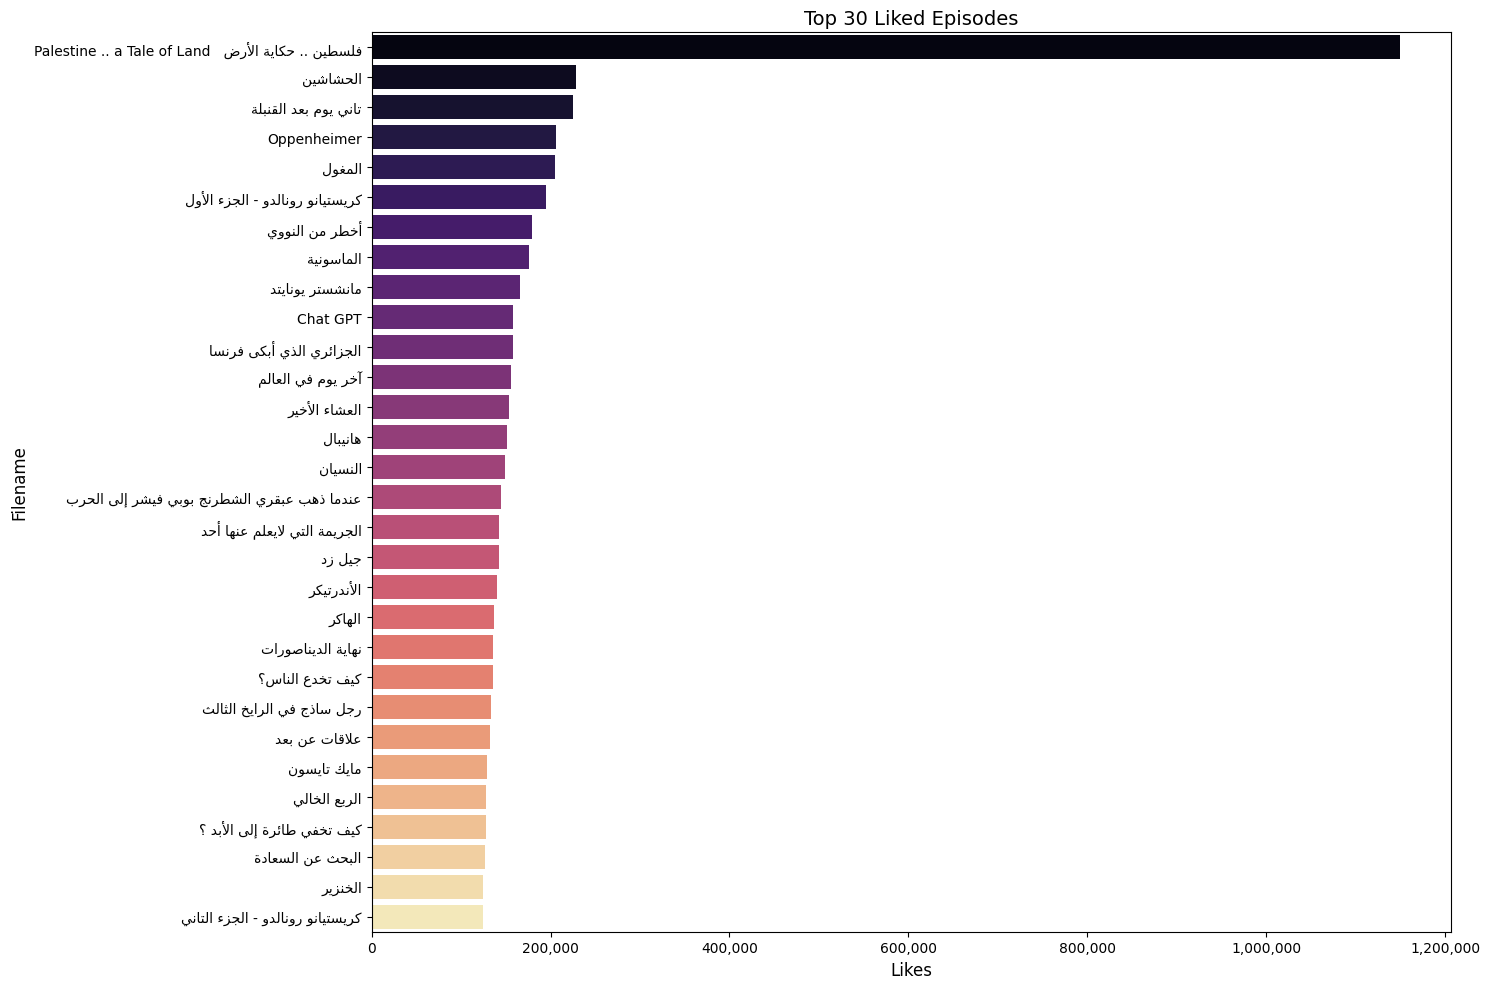

In [37]:
# Sort and select top 30 episodes
top_30_liked = df.sort_values('likes', ascending=False).head(30)

# Process Arabic text in the filename column
top_30_liked['processed_filename'] = top_30_liked['filename'].apply(process_arabic_text)

# Create the plot
plt.figure(figsize=(15, 10))

# Create horizontal bar plot of top 30
ax = sns.barplot(x='likes', y='processed_filename', data=top_30_liked, palette="magma")

# Format x-axis to show whole numbers
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Customize ticks and labels
plt.xlabel("Likes", fontsize=12)
plt.ylabel("Filename", fontsize=12)
plt.title("Top 30 Liked Episodes", fontsize=14)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

## Checking the episode with highest comments

<ipython-input-38-1a1a43009a52>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='comments', y='processed_filename', data=top_30_commented, palette="magma")


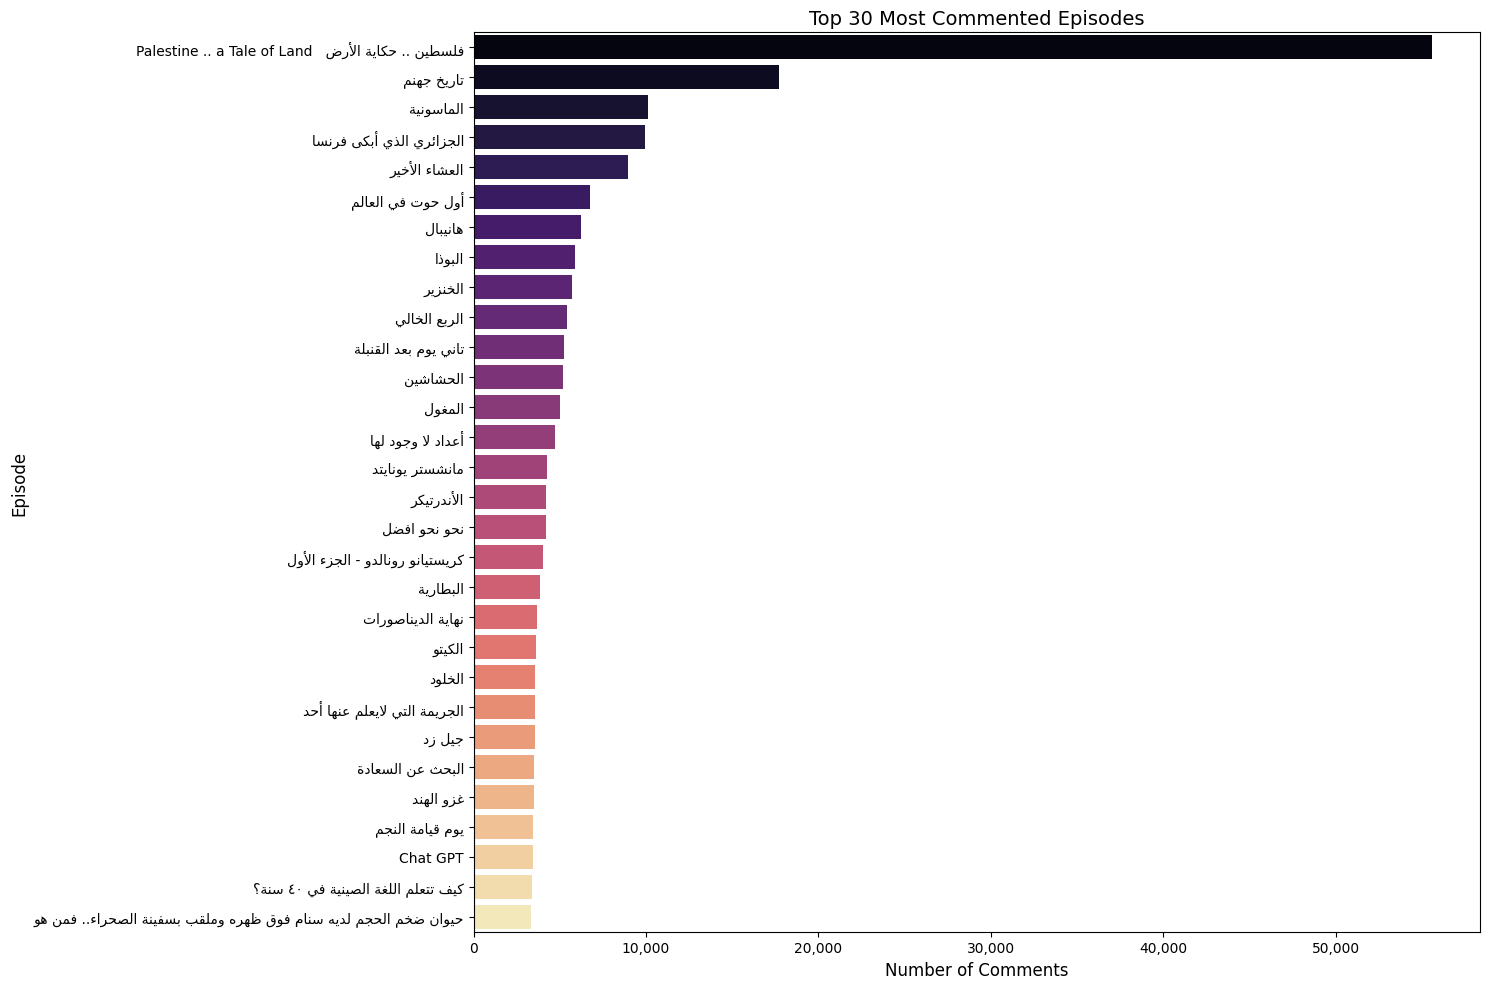

In [38]:
# Sort and select top 30 episodes based on comments
top_30_commented = df.sort_values('comments', ascending=False).head(30)

# Process Arabic text in the filename column
top_30_commented['processed_filename'] = top_30_commented['filename'].apply(process_arabic_text)

# Create the plot
plt.figure(figsize=(15, 10))

# Create horizontal bar plot of top 30 based on comments
ax = sns.barplot(x='comments', y='processed_filename', data=top_30_commented, palette="magma")

# Format x-axis to show whole numbers
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Customize ticks and labels
plt.xlabel("Number of Comments", fontsize=12)
plt.ylabel("Episode", fontsize=12)
plt.title("Top 30 Most Commented Episodes", fontsize=14)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

## Checking the most occurring words

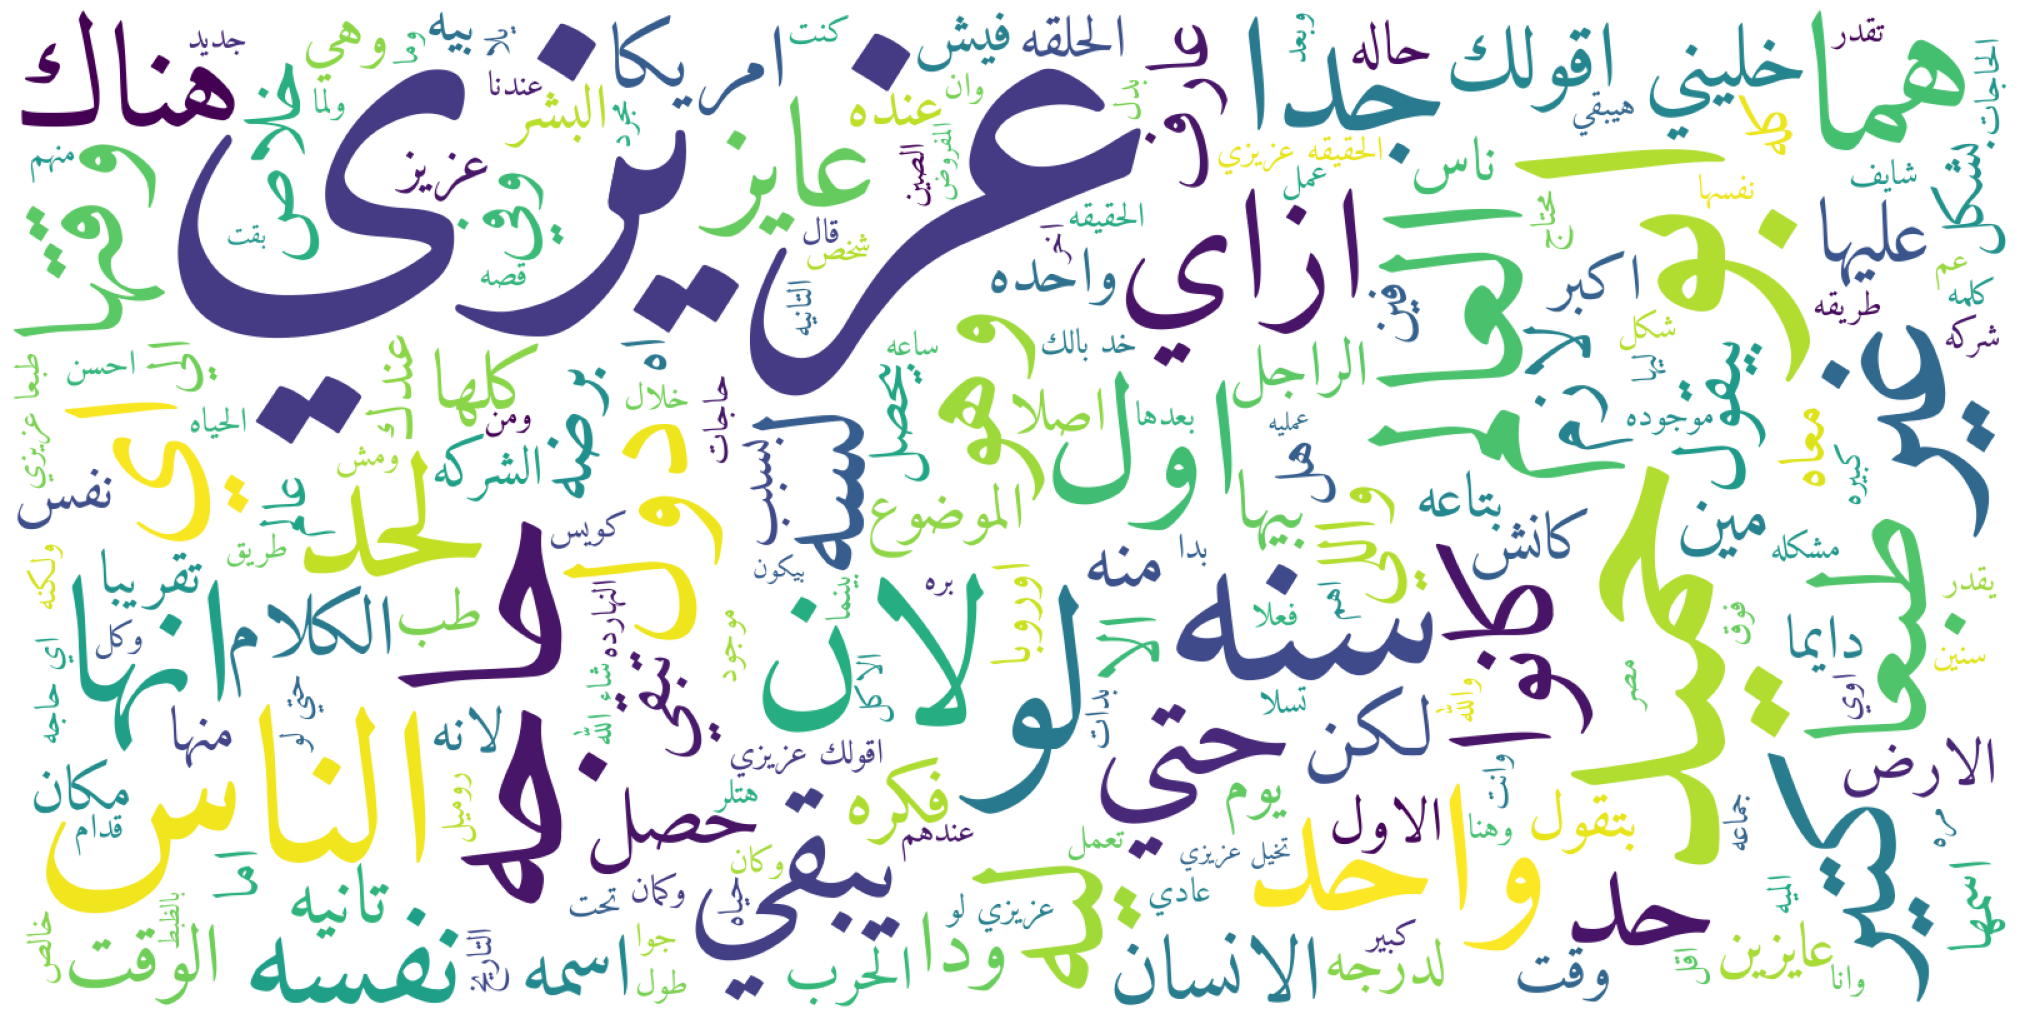

In [39]:
# Combine all text from the content column
all_text = ' '.join(df['content'])

# Create WordCloud with Arabic font support
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    font_path='/content/Amiri-Regular.ttf',  # Path to Amiri font
    max_words=200,
    font_step=2,
    prefer_horizontal=0.6,
    min_font_size=10
).generate(all_text)

# Display the word cloud
plt.figure(figsize=(20,10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Checking the most occuring categories

Based on the chart, the categories annotation is not imporant, it doesn't represent real categories. even if we dropped "el dahih" category, they're still very random and unuseful

In [40]:
def plot_top_categories(df, column, top_n=40):
    if column not in df.columns:
        print(f"Error: Column '{column}' not found in DataFrame.")
        return

    # Ensure all values are lists before exploding
    df[column] = df[column].apply(lambda x: x if isinstance(x, list) else [x])

    # Flatten lists into individual rows
    top_categories = df[column].explode().value_counts().head(top_n)

    processed_labels = [process_arabic_text(cat) for cat in top_categories.index]


    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_categories.values, y=processed_labels, palette="viridis")
    plt.xlabel("Count")
    plt.ylabel("Category")
    plt.title(f"Top {top_n} Most Occurring Categories")
    plt.show()

<ipython-input-40-7ba7e7ce9f31>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=processed_labels, palette="viridis")


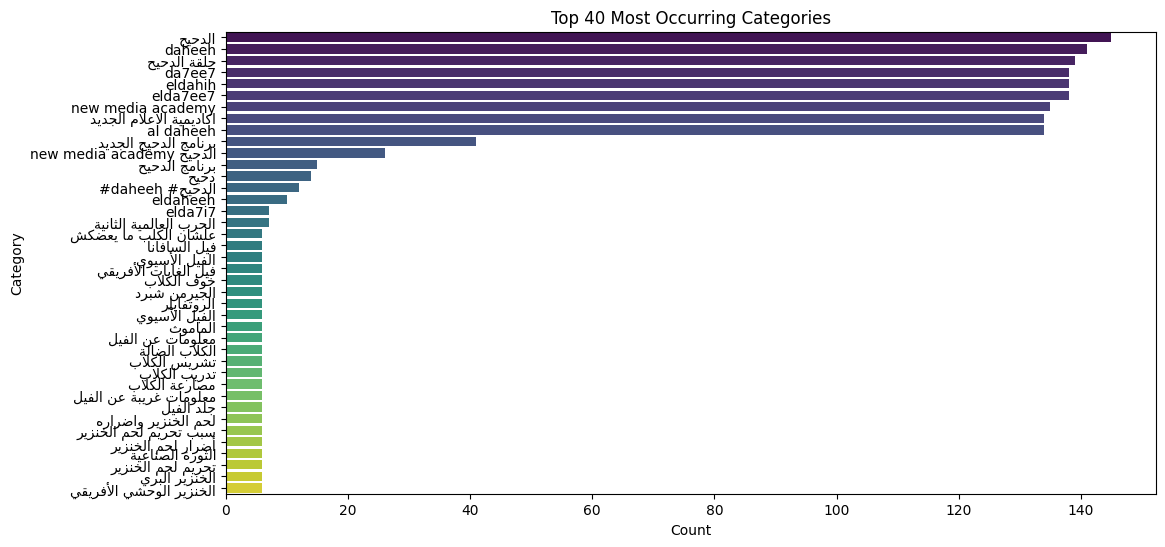

In [41]:
plot_top_categories(df, "categories", top_n=40)

## TF-IDF vs. Word count


It is observed that words with a high count in a document tend to have a low weight in that same document.

In [42]:
def compute_tfidf(df, text_column, max_features=1000):
    # Convert the text column to a list of documents
    documents = df[text_column].astype(str).tolist()

    # Initialize TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(max_features=max_features)

    # Fit and transform the text data
    tfidf_matrix = vectorizer.fit_transform(documents)

    # Convert the result to a DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    return tfidf_df

In [43]:
tfidf_result = compute_tfidf(df, "content")
print(tfidf_result.head())

         10       100        12        15        20        30        40  \
0  0.025472  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.008527  0.028119  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.009782  0.010753  0.013575  0.012336  0.032791  0.011594  0.000000   
3  0.006272  0.000000  0.000000  0.000000  0.014017  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.005617  0.004977  0.000000  0.006181   

         50       and        in  ...     ŸäŸÇŸàŸÑŸä       ŸäŸÉŸÜ       ŸäŸÑÿß     ŸäŸÑÿßŸÇŸä  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.011641  0.018228   
1  0.000000  0.028733  0.015182  ...  0.000000  0.000000  0.007793  0.000000   
2  0.000000  0.016482  0.000000  ...  0.029558  0.011695  0.026822  0.000000   
3  0.007983  0.031704  0.000000  ...  0.009476  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  ...  0.000000  0.010649  0.000000  0.000000   

       ŸäŸÖŸàÿ™     ŸäŸÜŸÅÿπÿ¥     ŸäŸàÿµŸÑ       Ÿä

In [44]:
def plot_tfidf_word(tfidf_df, word):
    if word not in tfidf_df.columns:
        print(f"'{word}' not found in the TF-IDF results.")
        return

    # Extract the TF-IDF scores for the word
    word_scores = tfidf_df[word]

    # Plot
    plt.figure(figsize=(16, 6))  # Further increase figure size
    ax = sns.barplot(x=word_scores.index, y=word_scores.values, palette="viridis")

    # Select a subset of x-ticks to reduce clutter
    num_labels = len(word_scores.index)
    step = max(1, num_labels // 10)  # Adjust step based on document count
    subset_indices = word_scores.index[::step]
    subset_labels = [str(i) for i in subset_indices]  # Ensure labels are strings

    # Apply formatting
    ax.set_xticks(subset_indices)
    ax.set_xticklabels(subset_labels, rotation=45, ha='right', fontsize=10)

    # Arabic title formatting
    plt.xlabel("Document Index")
    plt.ylabel("TF-IDF Score")
    plt.title(f"TF-IDF Scores for the word: '{process_arabic_text(word)}'")

    # Show the plot
    plt.show()

In [45]:
def compute_absolute_count(df, text_column, max_features=10000):
    # Convert the text column to a list of documents
    documents = df[text_column].astype(str).tolist()

    # Initialize Count Vectorizer
    vectorizer = CountVectorizer(max_features=max_features)

    # Fit and transform the text data
    count_matrix = vectorizer.fit_transform(documents)

    # Convert the result to a DataFrame
    count_df = pd.DataFrame(count_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    return count_df

In [46]:
abscount_result = compute_absolute_count(df, "content")
print(abscount_result.head())

   10  100  1000  11  12  120  13  14  15  150  ...  ŸäŸàŸÖ  ŸäŸàŸÖŸáÿß  ŸäŸàŸÖŸäÿß  ŸäŸàŸÖŸäŸÜ  \
0   2    0     0   0   0    0   0   0   0    0  ...    1      0      0      0   
1   1    3     0   0   0    0   0   0   0    0  ...    1      0      0      0   
2   1    1     0   0   1    0   5   1   1    0  ...   15      0      0      0   
3   1    0     1   0   0    0   0   0   0    0  ...    1      0      0      0   
4   0    0     1   0   0    0   1   1   1    0  ...   10      0      0      0   

   ŸäŸàŸÜÿßŸäÿ™ÿØ  ŸäŸàŸÜŸäŸà  ŸäŸàŸá  ŸäŸàŸáÿßŸÜ  ŸäŸäÿ¨Ÿàÿß  ŸäŸäÿ¨Ÿä  
0        0      0    0      0      0     0  
1        0      0    0      0      0     0  
2        0      0    0      0      0     1  
3        0      0    0      0      0     0  
4        0      0    0      0      0     0  

[5 rows x 10000 columns]


In [47]:
def plot_count_word(count_df, word):
    if word not in count_df.columns:
        print(f"'{word}' not found in the Count Vectorizer results.")
        return

    # Extract the absolute counts for the word
    word_counts = count_df[word]

    # Plot
    plt.figure(figsize=(16, 6))  # Increase figure size
    ax = sns.barplot(x=word_counts.index, y=word_counts.values, palette="viridis")

    # Select a subset of x-ticks to reduce clutter
    num_labels = len(word_counts.index)
    step = max(1, num_labels // 10)  # Adjust step based on document count
    subset_indices = word_counts.index[::step]
    subset_labels = [str(i) for i in subset_indices]  # Ensure labels are strings

    # Apply formatting
    ax.set_xticks(subset_indices)
    ax.set_xticklabels(subset_labels, rotation=45, ha='right', fontsize=10)

    # Arabic title formatting
    plt.xlabel("Document Index")
    plt.ylabel("Word Count")
    plt.title(f"Word Count for the word: '{process_arabic_text(word)}'")

    # Show the plot
    plt.show()

<ipython-input-44-81ed862e7f8c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=word_scores.index, y=word_scores.values, palette="viridis")


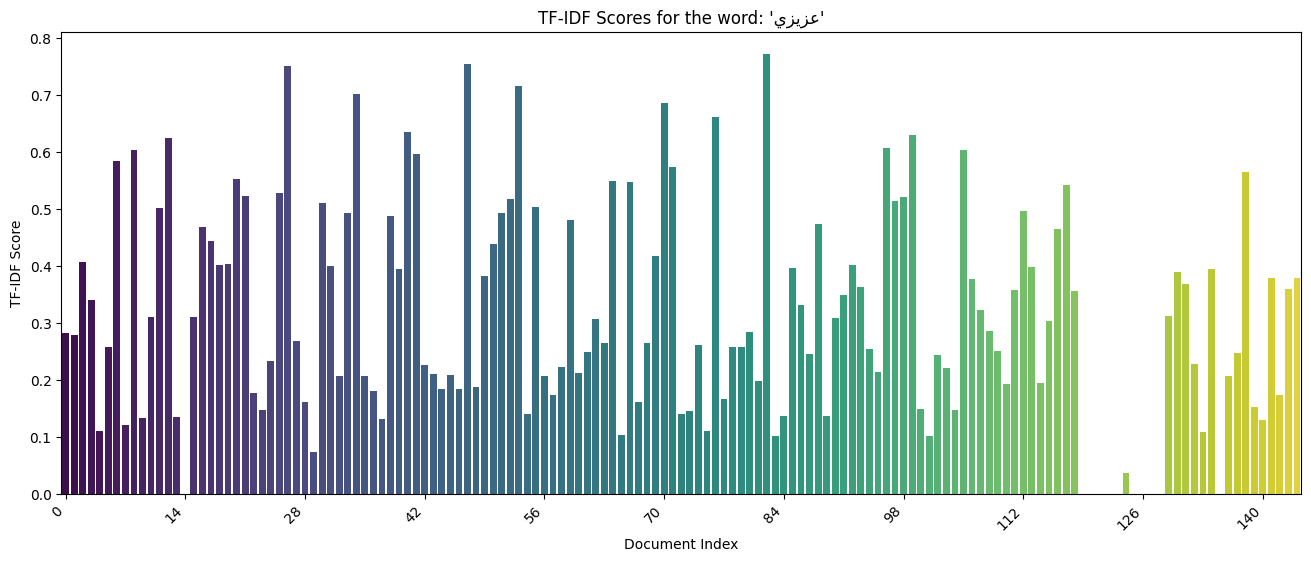

In [48]:
plot_tfidf_word(tfidf_result, "ÿπÿ≤Ÿäÿ≤Ÿä")

<ipython-input-47-5c74468bc6bb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=word_counts.index, y=word_counts.values, palette="viridis")


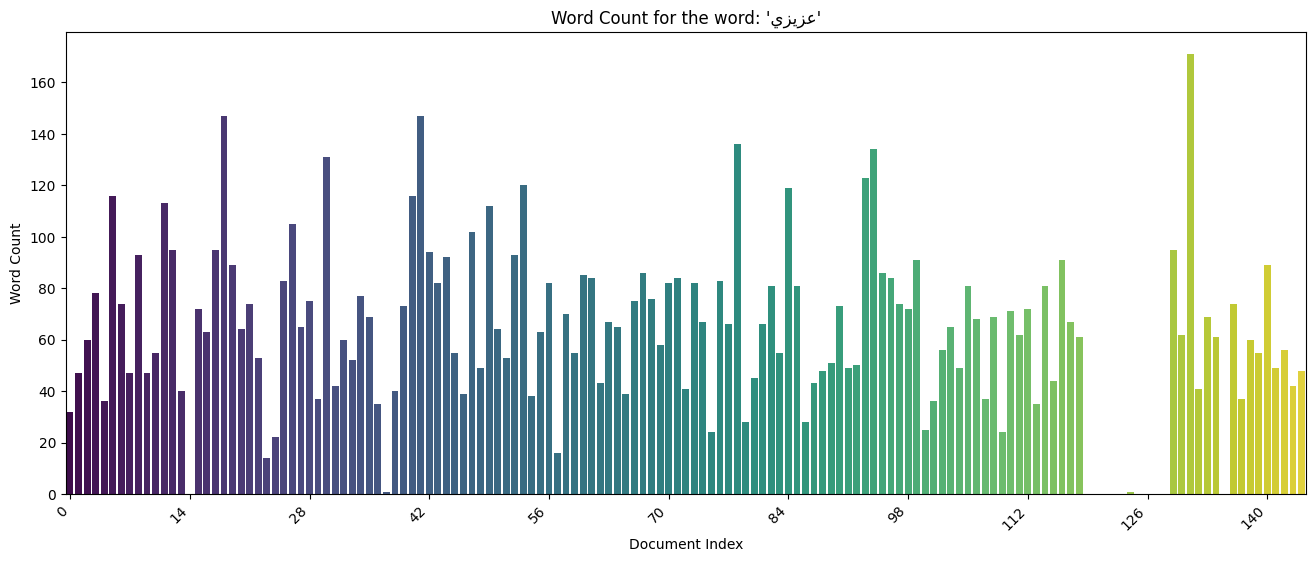

In [49]:
plot_count_word(abscount_result, "ÿπÿ≤Ÿäÿ≤Ÿä")

## Checking the correlation between views and comments

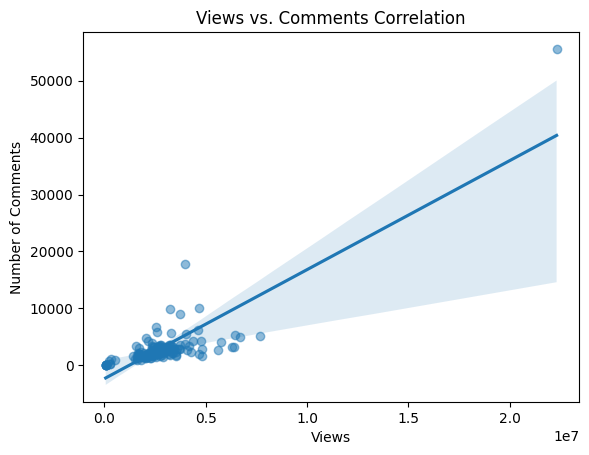

In [50]:
sns.regplot(data=df, x="views", y="comments", scatter_kws={"alpha":0.5})
plt.xlabel("Views")
plt.ylabel("Number of Comments")
plt.title("Views vs. Comments Correlation")
plt.show()

## Checking the correlation between likes and comments

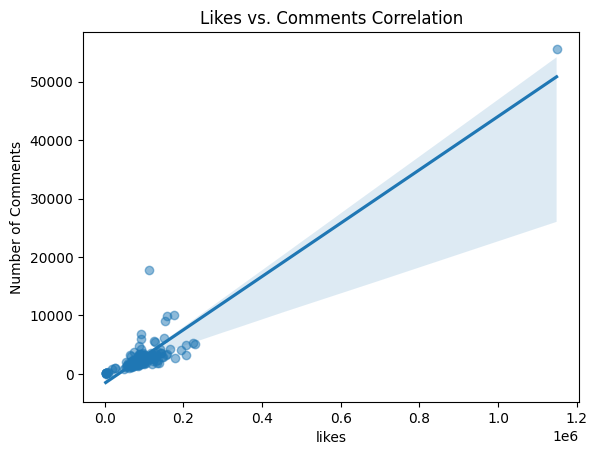

In [51]:
sns.regplot(data=df, x="likes", y="comments", scatter_kws={"alpha":0.5})
plt.xlabel("likes")
plt.ylabel("Number of Comments")
plt.title("Likes vs. Comments Correlation")
plt.show()

## Checking the correlation between likes and views

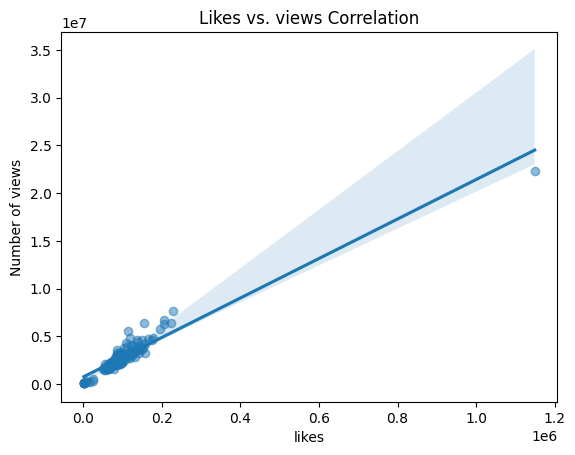

In [52]:
sns.regplot(data=df, x="likes", y="views", scatter_kws={"alpha":0.5})
plt.xlabel("likes")
plt.ylabel("Number of views")
plt.title("Likes vs. views Correlation")
plt.show()

***## END OF SUBMISSION***

Was exploring whether there is a strong correlation between the most frequently occurring words and the number of likes on a video. However, since most words in any given episode are generic words rather than meaningful terms, they do not provide significant insights. Additionally, the correlation with likes is likely influenced by the overall topic of the episode and the full script rather than the presence of a single word.

In [53]:
nltk.download("stopwords")
nltk.download("punkt")

# Load Arabic stopwords from NLTK
arabic_stopwords = set(stopwords.words("arabic"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [54]:
result_df = df.copy()  # Create a copy of the original DataFrame

In [55]:
def remove_stopwords_from_df(df):
    arabic_stops = set(stopwords.words('arabic'))
    # Add additional Egyptian Arabic stopwords that might not be in NLTK
    additional_stops = set([
        'ŸÖÿ¥', 'ŸäÿπŸÜŸä', 'ÿßŸÜÿ™', 'ŸàŸÑŸÉŸÜ', 'ÿ®ŸÇŸä', 'ÿ®ÿ≥', 'ÿ≤Ÿä', 'ÿØŸä', 'ÿπÿ¥ÿßŸÜ',
        'ÿπŸÑŸä', 'Ÿäÿß', 'ŸàŸÑÿß', 'ŸÅŸäŸá', 'ŸÉÿØÿß', 'ŸÇÿ®ŸÑ', 'ÿØÿß', 'ÿßŸÑŸÑŸä', 'ÿßŸäŸá',
        'ÿ≠ÿßÿ¨Ÿá','ŸÑŸà','ÿßŸä','ŸÖŸÖŸÉŸÜ','ŸÉŸÖÿßŸÜ','ÿßŸäŸá','ÿØŸä','ŸÉÿØÿß','ÿØÿß','ÿ¨ÿØÿß','ÿ∫Ÿäÿ±','ÿßŸÜŸá','ŸÑŸÖÿß','ŸáŸÜÿß','ÿ≥ŸÜŸá','ÿ≠ŸÖŸäÿØ','ÿßÿ®Ÿà','ÿπÿ≤Ÿäÿ≤Ÿä','ÿßŸÜÿß', 'ÿßÿ≠ŸÜÿß', 'ŸÉŸÑ', 'ÿ®ÿπÿ∂'
    ])

    # Combine the standard and additional stopwords
    all_stopwords = arabic_stops.union(additional_stops)

    # Function to process a single text
    def remove_stops(text):
        if pd.isna(text):
            return text

        # Tokenize Arabic text
        words = re.findall(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\u0590-\u05FF\w]+', text)

        # Filter out stopwords
        filtered_words = [word for word in words if word not in all_stopwords]

        # Join the words back into a string
        return " ".join(filtered_words)

    # Apply the function to the 'content' column
    result_df['content'] = result_df['content'].apply(remove_stops)

    return result_df

In [56]:
# Remove stopwords and get a new DataFrame
result_df = remove_stopwords_from_df(result_df)
result_df

filename  \
0                                             Chat GPT   
1                                          Oppenheimer   
2                                    ÿ¢ÿÆÿ± ŸäŸàŸÖ ŸÅŸä ÿßŸÑÿπÿßŸÑŸÖ   
3                                  ÿ£ÿ≠ŸÑŸâ ÿ®ÿ±ÿ¨ÿ± ŸÅŸä ÿßŸÑÿπÿßŸÑŸÖ   
4                                           ÿ£ÿ≠ŸÖÿØ ÿπÿØŸàŸäÿ©   
..                                                 ...   
140                                            ŸáÿßŸÜŸäÿ®ÿßŸÑ   
141  ŸáŸÑ ŸäŸÖŸÉŸÜ ÿ£ŸÜ ÿ™ÿµŸÑ ÿØÿ±ÿ¨ÿ© ÿßŸÑÿ≠ÿ±ÿßÿ±ÿ© ŸÅŸä ÿßŸÑÿ±Ÿäÿßÿ∂ Ÿàÿ®ÿ∫ÿØÿßÿØ ÿ•...   
142                             ŸäŸàŸÖ ŸÅŸä ÿ≠Ÿäÿßÿ© ÿ±ÿßÿ¶ŸÄÿØ ŸÅÿ∂ÿßÿ°   
143                                    ŸäŸàŸÖ ŸÇŸäÿßŸÖÿ© ÿßŸÑŸÜÿ¨ŸÖ   
144                                                  üòÇ   

                                               content   likes  dislikes  \
0    ÿπŸÖŸä ÿ®ÿ≥ŸäŸàŸÜŸä ÿßŸÑÿßŸäÿßŸÖ ÿ±ÿßÿ¨ŸÑ ÿ∑Ÿäÿ® ÿßŸÅÿ™ŸÉÿ±ÿ™ ÿπŸÖ ÿ®ÿ≥ŸäŸàŸÜŸä ÿ≥ÿß...  158194         0   
1    ÿ∑ÿ®ÿπÿß ÿ¨ŸàŸÜ ŸÖÿ≥ÿ™ÿ∫ÿ±ÿ® ÿÆÿßÿ∏ŸÅŸäŸÜŸÉ ŸÑŸäŸá ŸàÿßŸÑŸÑŸá ŸÉÿ™ÿ± ÿÆŸäÿ±ŸÉŸÖ ŸáŸä...  206192         0   
2    ÿßŸÜÿ™ŸÖ ÿπÿßÿ±ŸÅŸäŸÜ ÿ¨ŸÖÿßÿπŸá ÿ®ŸÇÿßŸÑŸÜÿß 13 ŸäŸàŸÖ ŸÖÿ≠ÿ®Ÿàÿ≥ŸäŸÜ ÿßŸÑÿ∫Ÿàÿßÿµ...  156239         0   
3    ÿßŸäŸàŸá ŸÖÿßŸÖÿß Ÿàÿßÿ≠ÿ¥ÿßŸÜŸä ÿßŸÑŸÉŸÑ ŸàÿßŸÑŸÑŸá ÿßŸÑÿ∫ÿ±ÿ®Ÿá ÿµÿπÿ®Ÿá ÿ®ŸÇŸàŸÑŸÉ...   98494         0   
4    ŸÅŸäŸÜ ŸÅŸÜÿØŸÖ ÿ¥ÿßŸäŸÅŸÜŸä ÿ®ÿØŸàÿ± ŸÑŸÇŸäŸÜÿß ŸÖÿßÿ±ÿßÿØŸàŸÜÿß ŸÅŸÜÿØŸÖ ÿßÿÆŸäÿ±ÿß...   54754         0   
..                                                 ...     ...       ...   
140  ÿßŸàŸá ŸÖÿßÿ±ŸÉŸäŸÜŸàÿ≥ ÿßÿπÿØ ÿßÿ≥ÿ™ÿ∑Ÿäÿπ ÿßŸÑŸÜŸàŸÖ ŸÅÿ±ÿ∑ ŸÇŸÑŸÇŸä ÿ±ŸàŸÖÿß ŸàŸÖ...  151086         0   
141  ŸäÿßŸá ÿ®ÿ≠ÿ± ÿ™ÿπÿ®ÿßŸÜ ÿßŸàŸä ÿ®ÿ≠ÿ± ÿ™ÿπÿ®ÿßŸÜ ÿ™ÿπÿ®ÿßŸÜ ŸÇŸÑÿ®Ÿä ŸÖŸÉÿ≥Ÿàÿ± Ÿà...  107315         0   
142  ÿ¨ŸÖÿßÿπŸá ŸÉŸÜÿß ÿÆŸÑÿµŸÜÿß ÿßŸÑŸÇÿµŸá ÿ®ŸÇÿßŸÑŸÜÿß 12 ÿ≥Ÿäÿ¥ŸÜ ÿßŸÑŸÖÿ¥ŸÉŸÑŸá ÿ™...   78215         0   
143  ŸÉŸÑŸÜÿß ÿ®ÿ™ÿ¥ŸàŸÅ ÿßŸÑÿ¥ŸÖÿ≥ ŸäŸàŸÖ ŸÖÿ≠ÿØÿ¥ Ÿäÿπÿ±ŸÅ ÿßÿµŸÑ ÿßŸÑÿ¥ŸÖÿ≥ ŸáÿπŸÖŸÑ ...   90608         0   
144  ŸÇŸÑÿ® ÿßÿ≤ÿ±ŸÇ ÿßÿ≤ÿ±ŸÇ ÿßŸÑŸÇÿ±ŸÅ ŸÇÿ±ŸÅ ŸàÿßŸÜÿß ŸÖÿßŸÑŸä ŸÖÿµÿ∑ŸÅŸä Ÿàÿ®ÿπÿØŸäŸÜ...   58615         0   

       views  comments                                         categories  
0    4196934      3417  [chat gpt, how to use chat gpt, chat gpt expla...  
1    6313109      3213  [ŸÖÿ¥ÿ±Ÿàÿπ ŸÖÿßŸÜŸáÿßÿ™ŸÜ, ŸÖÿ¥ÿ±Ÿàÿπ ŸÖÿßŸÜŸáÿßÿ™ŸÜ ÿßŸÑŸÜŸàŸàŸä, manhatta...  
2    6396147      3185  [ÿßŸÑÿØÿ≠Ÿäÿ≠, ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿßŸÑÿØÿ≠Ÿäÿ≠ ÿßŸÑÿ¨ÿØŸäÿØ, eldahih, elda7e...  
3    2322834      2258  [ÿßŸÑÿØÿ≠Ÿäÿ≠, ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿßŸÑÿØÿ≠Ÿäÿ≠ ÿßŸÑÿ¨ÿØŸäÿØ, #daheeh #ÿßŸÑÿØÿ≠Ÿäÿ≠...  
4    1696731      1961  [ÿßŸÑÿØÿ≠Ÿäÿ≠, ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿßŸÑÿØÿ≠Ÿäÿ≠ ÿßŸÑÿ¨ÿØŸäÿØ, ÿ≠ŸÑŸÇÿ© ÿßŸÑÿØÿ≠Ÿäÿ≠, ÿ®ÿ±...  
..       ...       ...                                                ...  
140  4607701      6220  [ŸáÿßŸÜŸäÿ®ÿßŸÑ, hannibal, ancient rome, history of r...  
141  3083126      2776  [ÿßŸÑÿØÿ≠Ÿäÿ≠, eldahih, elda7ee7, da7ee7, al daheeh,...  
142  2431407      1532  [ÿßŸÑÿØÿ≠Ÿäÿ≠, eldahih, elda7ee7, da7ee7, al daheeh,...  
143  2644684      3432  [ÿßŸÑÿØÿ≠Ÿäÿ≠, ŸÜŸäŸà ŸÖŸäÿØŸäÿß ÿ£ŸÉÿßÿØŸäŸÖŸä, da7e7, new media a...  
144  1643592      1360  [ÿßŸÑÿØÿ≠Ÿäÿ≠, eldahih, elda7ee7, da7ee7, al daheeh,...  

[145 rows x 7 columns]

In [57]:
def analyze_word_frequency_and_correlation(df, top_n=20):

    view_column = None
    for col in df.columns:
        if col.lower() in ['views', 'view_count', 'viewcount', 'view']:
            view_column = col
            break


    # Step 1: Extract all words from content
    all_words = []
    for text in df['content'].dropna():
        # Use regex to extract Arabic words
        words = re.findall(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\u0590-\u05FF\w]+', text)
        all_words.extend(words)

    # Step 2: Count word frequencies
    word_counts = Counter(all_words)
    top_words = dict(word_counts.most_common(top_n))

    # Step 3: Create binary features for each top word
    correlation_data = []

    for word, count in top_words.items():
        # Create a binary column indicating if the content contains this word
        df[f'has_{word}'] = df['content'].apply(
            lambda x: 1 if pd.notna(x) and word in re.findall(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\u0590-\u05FF\w]+', x) else 0
        )

        # Calculate correlation with views
        corr, p_value = pearsonr(df[f'has_{word}'], df[view_column])

        # Add to results
        correlation_data.append({
            'word': word,
            'frequency': count,
            'correlation': corr,
            'p_value': p_value,
            'significant': p_value < 0.05
        })

        # Clean up temporary column
        df.drop(f'has_{word}', axis=1, inplace=True)

    # Create a DataFrame with correlation results
    corr_df = pd.DataFrame(correlation_data)
    corr_df = corr_df.sort_values('correlation', ascending=False)

    # Visualize results
    plt.figure(figsize=(12, 10))

    # Plot word frequency
    plt.subplot(2, 1, 1)
    plt.bar(top_words.keys(), top_words.values())
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top {top_n} Most Frequent Words')
    plt.tight_layout()

    # Plot correlation with views
    plt.subplot(2, 1, 2)
    colors = ['g' if sig else 'r' for sig in corr_df['significant']]
    plt.bar(corr_df['word'], corr_df['correlation'], color=colors)
    plt.xticks(rotation=45, ha='right')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.title('Correlation Between Word Presence and Views')
    plt.tight_layout()

    plt.savefig('word_analysis.png')
    plt.close()

    return top_words, corr_df

In [58]:
word_freq, correlation = analyze_word_frequency_and_correlation(result_df)
print(correlation.sort_values('correlation', ascending=False))

      word  frequency  correlation   p_value  significant
5      ŸÑÿ≠ÿØ        803     0.326173  0.000062         True
2      ŸÑÿßŸÜ        886     0.324328  0.000069         True
15   ŸÉÿßŸÜŸàÿß        652     0.307907  0.000165         True
12     ÿØŸàŸÑ        690     0.281778  0.000596         True
16   ÿßŸÑŸàŸÇÿ™        636     0.271205  0.000968         True
10     ÿßŸàŸÑ        702     0.264608  0.001299         True
1   ÿßŸÑÿπÿßŸÑŸÖ       1036     0.263840  0.001343         True
9     ŸÉÿ™Ÿäÿ±        704     0.255027  0.001963         True
7     ÿßŸÜŸáÿß        737     0.252581  0.002177         True
0    ÿßŸÑŸÜÿßÿ≥       1114     0.245709  0.002893         True
14   ÿÆŸÑŸäŸÜŸä        667     0.222973  0.007023         True
19     ÿ≠ÿ™Ÿä        615     0.202050  0.014804         True
3     ÿßŸÑŸÑŸá        836     0.198302  0.016802         True
13    Ÿäÿ®ŸÇŸä        670     0.198208  0.016856         True
11      ÿ≠ÿØ        694     0.190187  0.021947         True
8     ÿπÿßŸäÿ